In [103]:
import sys, os
import pandas as pd
import numpy as np

from IPython.display import display

In [104]:
# Declare all variables as strings. Spaces must be replaced with '+', i.e., change 'John Smith' to 'John+Smith'.
# Define the lat, long of the location and the year
locs = 6        #this is the number of locations we are using
p1_lat, p1_lon = 39.835694, -105.359097         #Golden
p2_lat, p2_lon = 38.821557, -104.660183         #Colorado Spring
p3_lat, p3_lon = 39.656653, -106.343787         #Vale
p4_lat, p4_lon = 40.569931, -105.182480         #Fort Collins
p5_lat, p5_lon = 39.044038, -108.594066         #Grand junction
p6_lat, p6_lon = 36.995228, -102.044999         #3points
P_lats = [p1_lat, p2_lat, p3_lat, p4_lat, p5_lat, p6_lat]
P_lons = [p1_lon, p2_lon, p3_lon, p4_lon, p5_lon, p6_lon]

#this text array will be used for prints/ plots labels
text = ['Location1(Golden,CO)', 'Location2(Colorado Spring,CO)',
        'Location3(Vale,CO)', 'Location4(Fort Collins,CO)',
        'Location5(Grand Junction,CO)', 'Location6(3Points,CO)']

# My API-key
api_key = '1gHoGjlIGeXbQOpiunnlRrJS9vYYb490MA4n9X7s'

# Set the attributes to extract (e.g., dhi, ghi, etc.), separated by commas.
attributes = 'air_temperature,solar_zenith_angle,dew_point,relative_humidity,surface_albedo,surface_pressure,total_precipitable_water,wind_speed,wind_direction,ghi,dhi,dni'

# Choose year of data
year = '2010'
# Set leap year to true or false. True will return leap day data if present, false will not.
leap_year = 'false'
# Set time interval in minutes, i.e., '30' is half hour intervals. Valid intervals are 30 & 60.
interval = '30'
# Specify Coordinated Universal Time (UTC), 'true' will use UTC, 'false' will use the local time zone of the data.
# NOTE: In order to use the NSRDB data in SAM, you must specify UTC as 'false'. SAM requires the data to be in the
# local time zone.
utc = 'false'
# Your full name, use '+' instead of spaces.
your_name = 'Sara+Abouelella'
# Your reason for using the NSRDB.
reason_for_use = 'interview'
# Your affiliation
your_affiliation = 'student'
# Your email address
your_email = 'sabouelella3@gatech.edu'
# Please join our mailing list so we can keep you up-to-date on new developments.
mailing_list = 'false'

# Declare url string
url = 'https://developer.nrel.gov/api/nsrdb/v2/solar/psm3-2-2-download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=p4_lat, lon=p4_lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes)
# Return just the first 2 lines to get metadata:
info = pd.read_csv(url, nrows=1)
# See metadata for specified properties, e.g., timezone and elevation
timezone, elevation = info['Local Time Zone'], info['Elevation']

In [105]:
# View metadata
info

,Source,Location ID,City,State,Country,Latitude,Longitude,Time Zone,Elevation,Local Time Zone,...,Cloud Type 11,Cloud Type 12,Fill Flag 0,Fill Flag 1,Fill Flag 2,Fill Flag 3,Fill Flag 4,Fill Flag 5,Surface Albedo Units,Version
0,NSRDB,479473,-,-,-,40.57,-105.18,-7,1743,-7,...,Dust,Smoke,NaN,Missing Image,Low Irradiance,Exceeds Clearsky,Missing CLoud Properties,Rayleigh Violation,NaN,v3.2.2


In [106]:
# Return all but first 2 lines of csv to get data:

dfs = []
#loop for all the location
for i in range(locs):
    df = pd.read_csv('https://developer.nrel.gov/api/nsrdb/v2/solar/psm3-download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=P_lats[i], lon=P_lons[i], leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes), skiprows=2)
    
    # Set the time index in the pandas dataframe:
    df = df.set_index(pd.date_range('1/1/{yr}'.format(yr=year), freq=interval+'Min', periods=525600/int(interval)))
    print('shape for loc{}:'.format(i+1), df.shape)
    dfs.append(df)
#check some rows from one of them
dfs[1].head(8)
# print(df.iloc[2,:])

shape for loc1: (17520, 17)
shape for loc2: (17520, 17)
shape for loc3: (17520, 17)
shape for loc4: (17520, 17)
shape for loc5: (17520, 17)
shape for loc6: (17520, 17)


,Year,Month,Day,Hour,Minute,Temperature,Solar Zenith Angle,Dew Point,Relative Humidity,Surface Albedo,Pressure,Precipitable Water,Wind Speed,Wind Direction,GHI,DHI,DNI
2010-01-01 00:00:00,2010,1,1,0,0,-8,164.18,-16,53.95,0.866,810,0.540,3.6,302.6,0,0,0
2010-01-01 00:30:00,2010,1,1,0,30,-7,163.11,-16,53.94,0.866,810,0.571,3.4,302.6,0,0,0
2010-01-01 01:00:00,2010,1,1,1,0,-7,159.95,-16,52.81,0.866,810,0.603,3.3,307.1,0,0,0
2010-01-01 01:30:00,2010,1,1,1,30,-7,155.51,-16,52.81,0.866,810,0.621,3.0,307.1,0,0,0
2010-01-01 02:00:00,2010,1,1,2,0,-8,150.38,-16,53.11,0.866,810,0.640,2.8,312.7,0,0,0
2010-01-01 02:30:00,2010,1,1,2,30,-7,144.88,-16,49.13,0.866,810,0.652,2.8,312.7,0,0,0
2010-01-01 03:00:00,2010,1,1,3,0,-7,139.18,-16,51.95,0.866,810,0.665,2.8,322.5,0,0,0
2010-01-01 03:30:00,2010,1,1,3,30,-7,133.37,-16,51.95,0.866,810,0.671,2.5,322.5,0,0,0


In [107]:
dffs = []
# year column is constant, drop it
for i in range(locs):
    dff = dfs[i].drop(columns=['Year'], axis=1)
    dffs.append(dff)
dffs[1].head()

,Month,Day,Hour,Minute,Temperature,Solar Zenith Angle,Dew Point,Relative Humidity,Surface Albedo,Pressure,Precipitable Water,Wind Speed,Wind Direction,GHI,DHI,DNI
2010-01-01 00:00:00,1,1,0,0,-8,164.18,-16,53.95,0.866,810,0.540,3.6,302.6,0,0,0
2010-01-01 00:30:00,1,1,0,30,-7,163.11,-16,53.94,0.866,810,0.571,3.4,302.6,0,0,0
2010-01-01 01:00:00,1,1,1,0,-7,159.95,-16,52.81,0.866,810,0.603,3.3,307.1,0,0,0
2010-01-01 01:30:00,1,1,1,30,-7,155.51,-16,52.81,0.866,810,0.621,3.0,307.1,0,0,0
2010-01-01 02:00:00,1,1,2,0,-8,150.38,-16,53.11,0.866,810,0.640,2.8,312.7,0,0,0


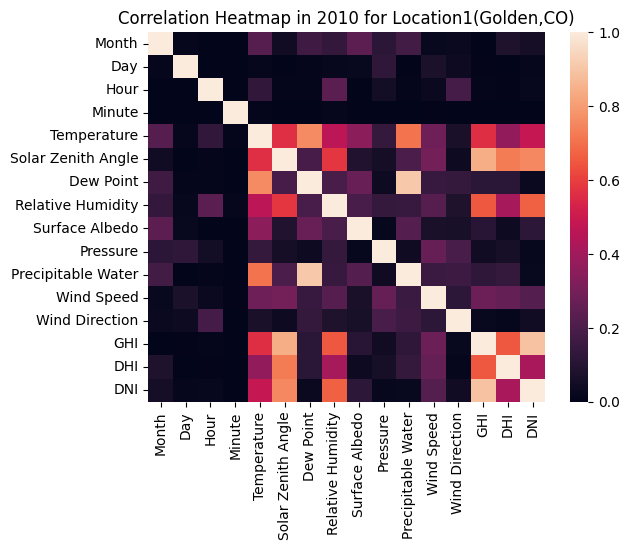

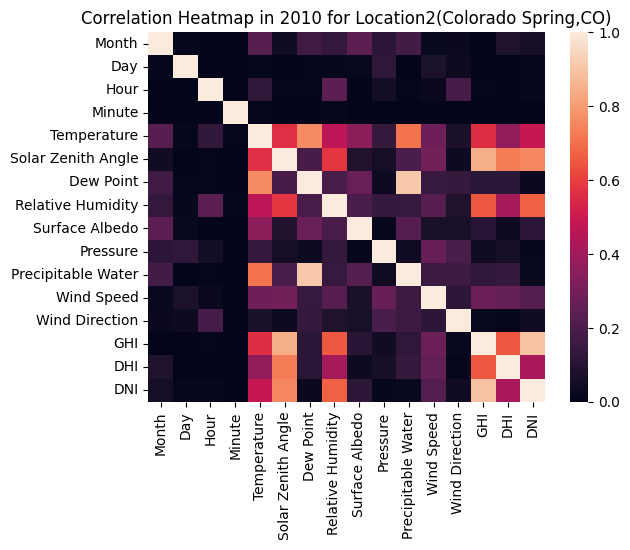

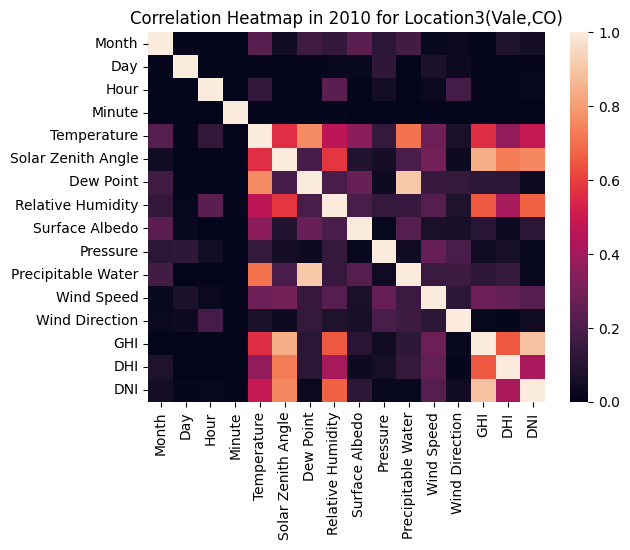

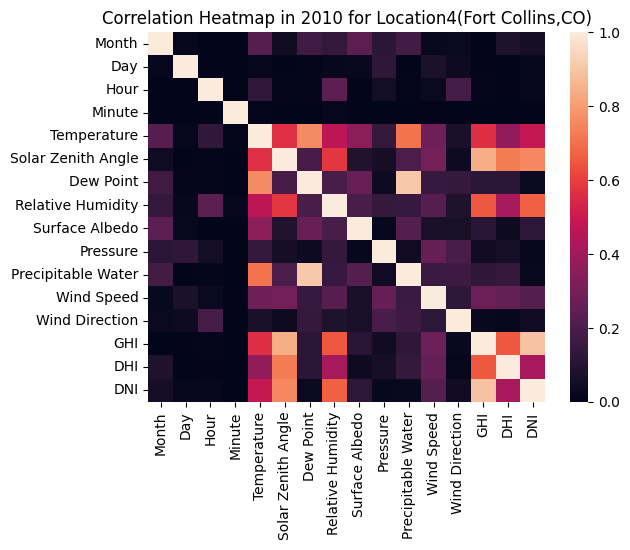

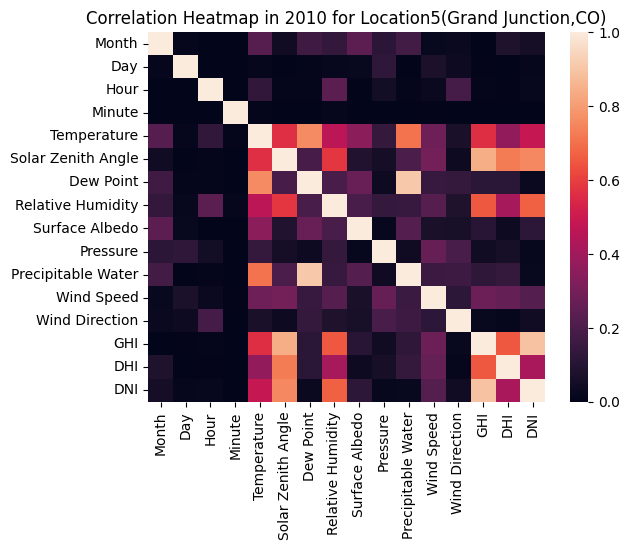

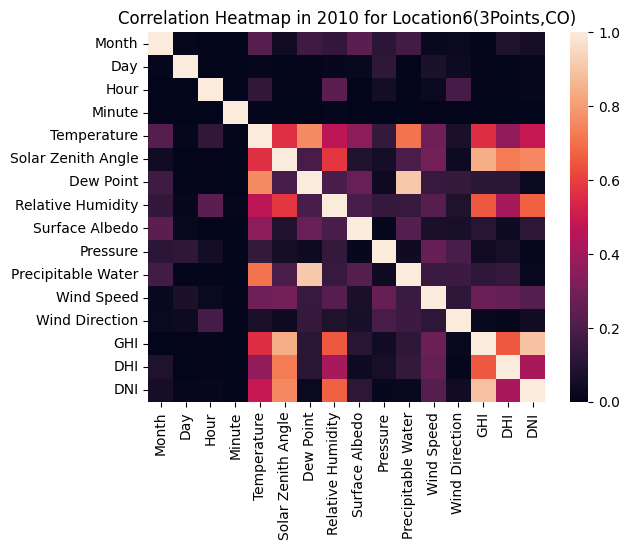

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

#correlation matrix for all the features
for i in range(locs):
    plt.clf()
    corr_matrix = abs(dff.corr())
    heatmap = sns.heatmap(abs(corr_matrix))
    plt.title('Correlation Heatmap in 2010 for {}'.format(text[i]))
    plt.show()

In [109]:
# adding columns for future DNI values
for i in range(locs):
    dfs[i]['DNI after 0.5h'] = dfs[i][['DNI']].shift(1)
    dfs[i]['DNI after 1.0h'] = dfs[i][['DNI']].shift(2)
    dfs[i]['DNI after 1.5h'] = dfs[i][['DNI']].shift(3)
    dfs[i]['DNI after 2.0h'] = dfs[i][['DNI']].shift(4)
    dfs[i]['DNI after 2.5h'] = dfs[i][['DNI']].shift(5)
    dfs[i]['DNI after 3.0h'] = dfs[i][['DNI']].shift(6)
    dfs[i]['DNI after 3.5h'] = dfs[i][['DNI']].shift(7)
    dfs[i]['DNI after 4.0h'] = dfs[i][['DNI']].shift(8)
    
#print one of the dataframes to check future DNI are added  
dfs[1].head()

,Year,Month,Day,Hour,Minute,Temperature,Solar Zenith Angle,Dew Point,Relative Humidity,Surface Albedo,...,DHI,DNI,DNI after 0.5h,DNI after 1.0h,DNI after 1.5h,DNI after 2.0h,DNI after 2.5h,DNI after 3.0h,DNI after 3.5h,DNI after 4.0h
2010-01-01 00:00:00,2010,1,1,0,0,-8,164.18,-16,53.95,0.866,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 00:30:00,2010,1,1,0,30,-7,163.11,-16,53.94,0.866,...,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 01:00:00,2010,1,1,1,0,-7,159.95,-16,52.81,0.866,...,0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 01:30:00,2010,1,1,1,30,-7,155.51,-16,52.81,0.866,...,0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2010-01-01 02:00:00,2010,1,1,2,0,-8,150.38,-16,53.11,0.866,...,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [110]:
# drop month, day, hour, minute to plot the heat map again
sub_dfs = []
for i in range(locs):
    sub_dfs.append(dfs[i].iloc[:, 5:])

sub_dfs[1].head()

,Temperature,Solar Zenith Angle,Dew Point,Relative Humidity,Surface Albedo,Pressure,Precipitable Water,Wind Speed,Wind Direction,GHI,DHI,DNI,DNI after 0.5h,DNI after 1.0h,DNI after 1.5h,DNI after 2.0h,DNI after 2.5h,DNI after 3.0h,DNI after 3.5h,DNI after 4.0h
2010-01-01 00:00:00,-8,164.18,-16,53.95,0.866,810,0.540,3.6,302.6,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 00:30:00,-7,163.11,-16,53.94,0.866,810,0.571,3.4,302.6,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 01:00:00,-7,159.95,-16,52.81,0.866,810,0.603,3.3,307.1,0,0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 01:30:00,-7,155.51,-16,52.81,0.866,810,0.621,3.0,307.1,0,0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2010-01-01 02:00:00,-8,150.38,-16,53.11,0.866,810,0.640,2.8,312.7,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


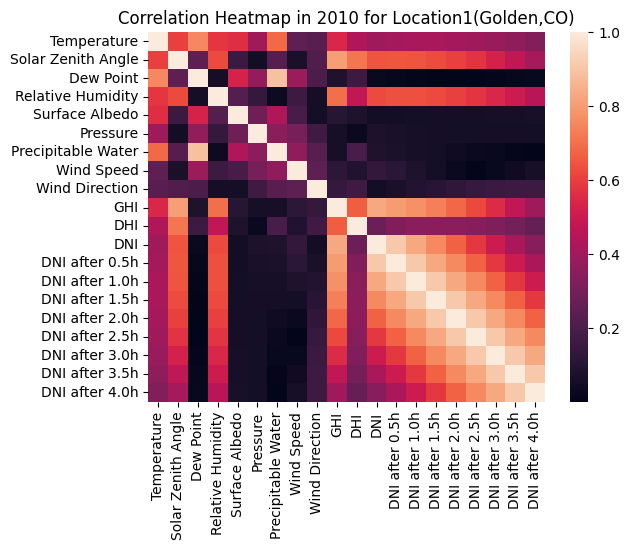

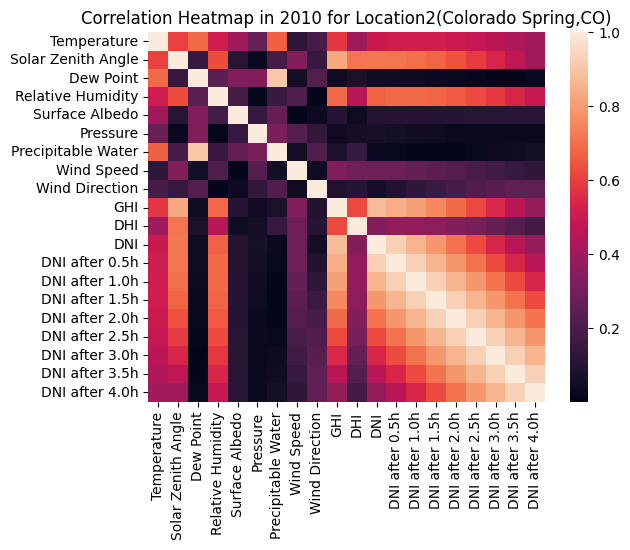

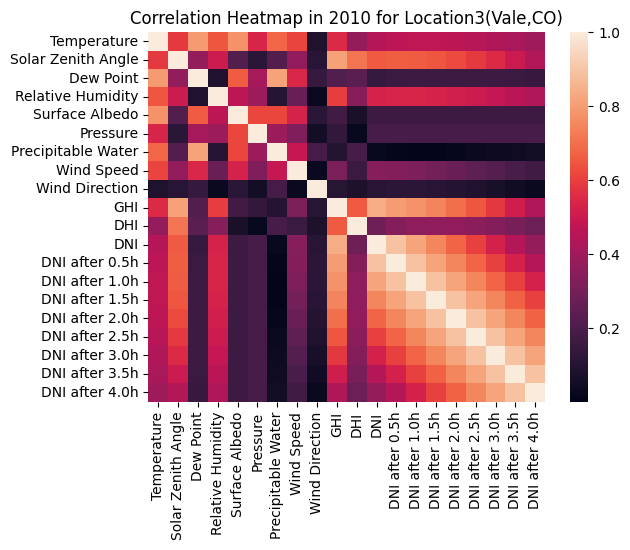

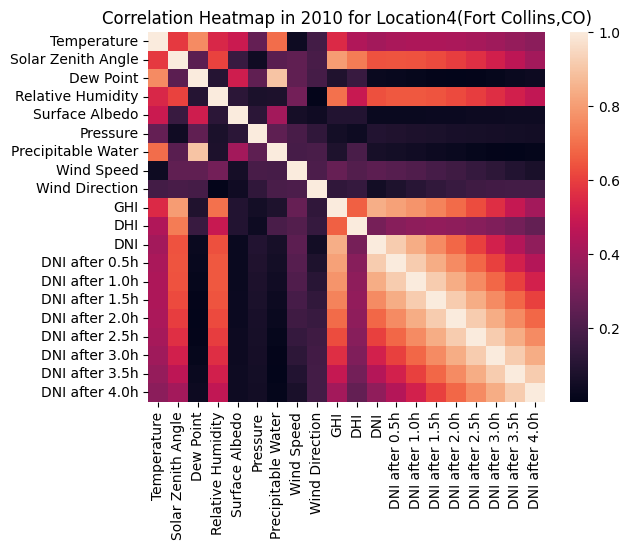

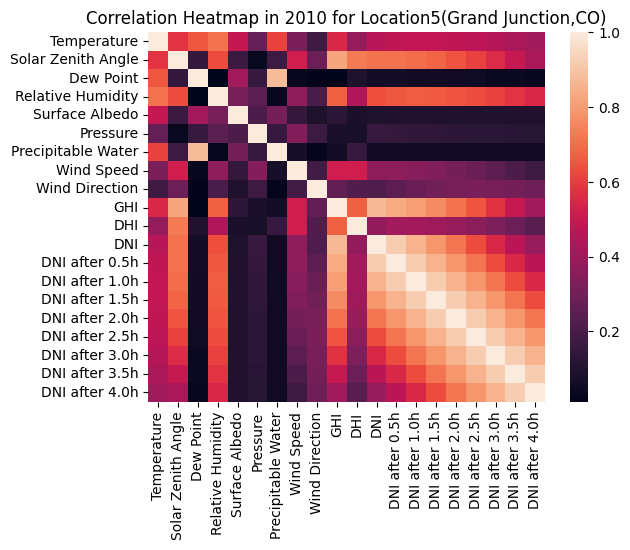

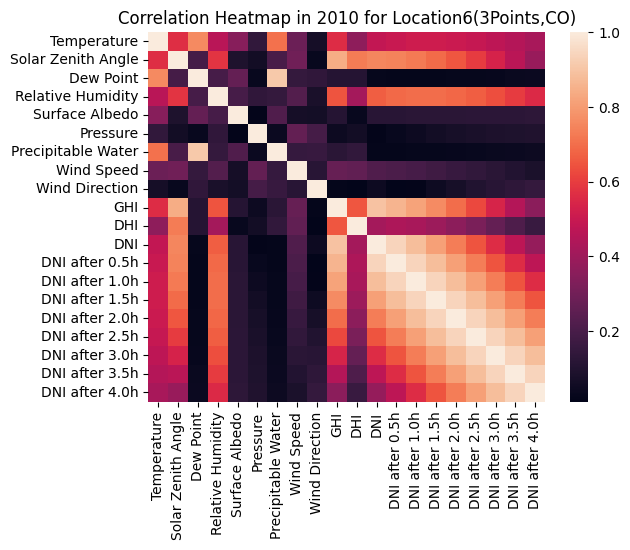

In [111]:
# correlation matrix without time(s) columns
for i in range(locs):
    plt.clf()
    corr_matrix = abs(sub_dfs[i].corr())
    dataplot = sns.heatmap(corr_matrix)
    # displaying heatmap
    plt.title('Correlation Heatmap in 2010 for {}'.format(text[i]))
    plt.show()

In [112]:
# as noticed from the previous heat maps, some features are non-relevent
# drop them
for i in range(locs):
    sub_dfs[i].drop(['Dew Point', 'Surface Albedo', 'Pressure', 'Precipitable Water', 'Wind Speed', 'Wind Direction'], axis=1, inplace=True)

sub_dfs[1].head()

,Temperature,Solar Zenith Angle,Relative Humidity,GHI,DHI,DNI,DNI after 0.5h,DNI after 1.0h,DNI after 1.5h,DNI after 2.0h,DNI after 2.5h,DNI after 3.0h,DNI after 3.5h,DNI after 4.0h
2010-01-01 00:00:00,-8,164.18,53.95,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 00:30:00,-7,163.11,53.94,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 01:00:00,-7,159.95,52.81,0,0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 01:30:00,-7,155.51,52.81,0,0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2010-01-01 02:00:00,-8,150.38,53.11,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


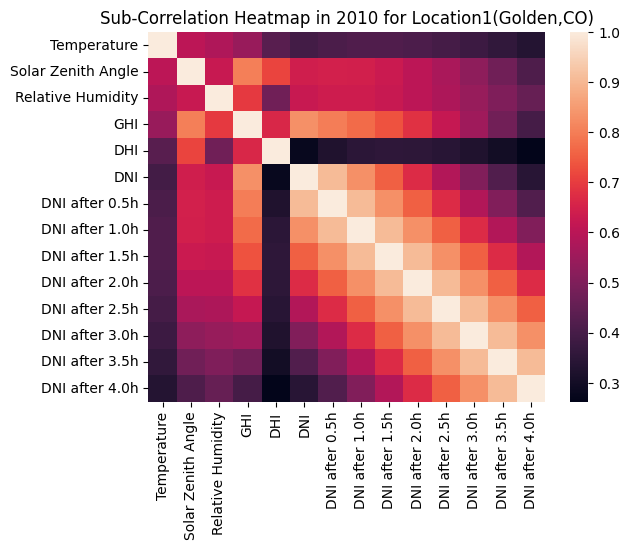

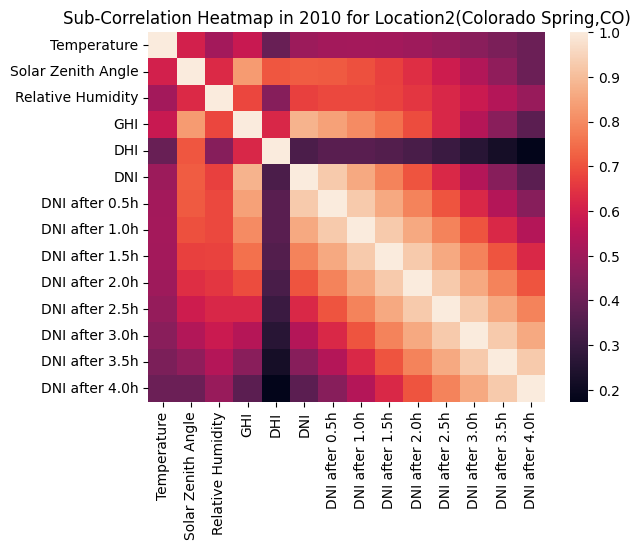

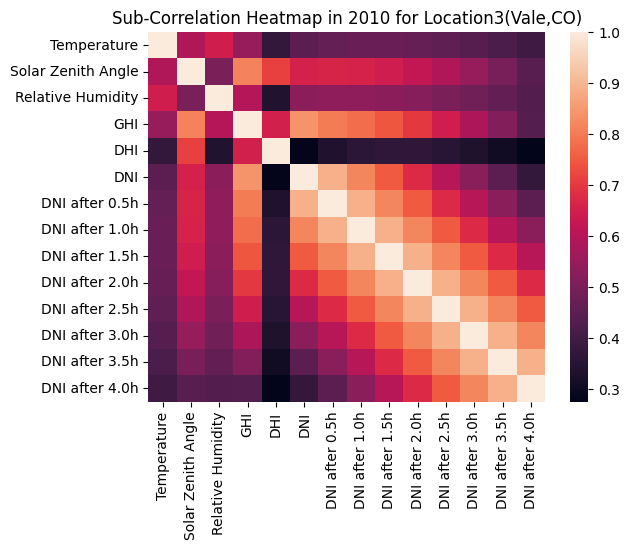

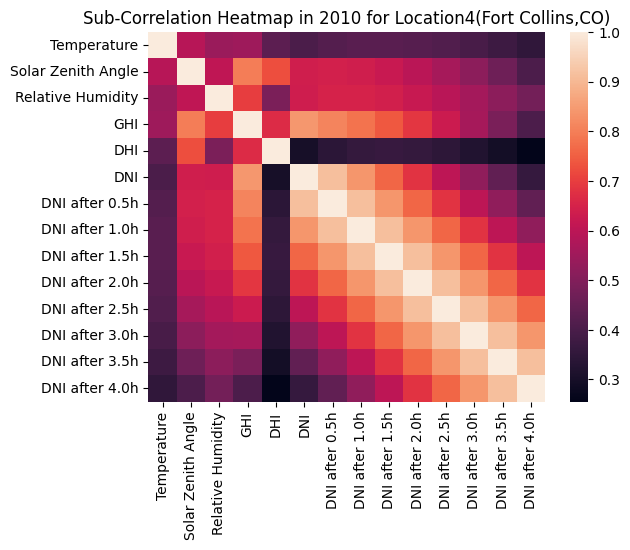

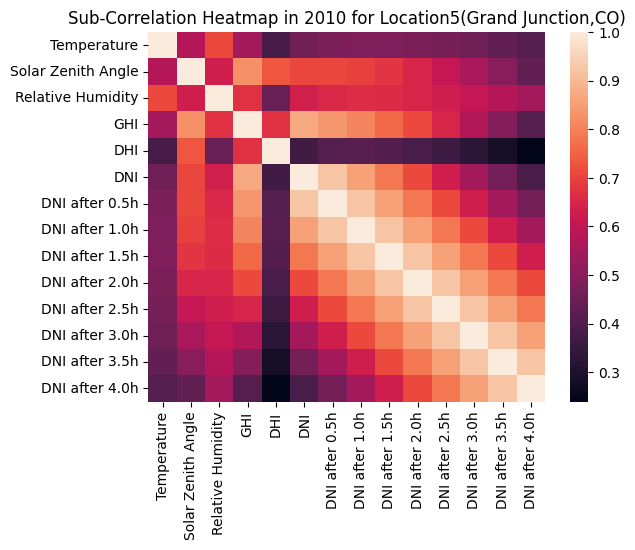

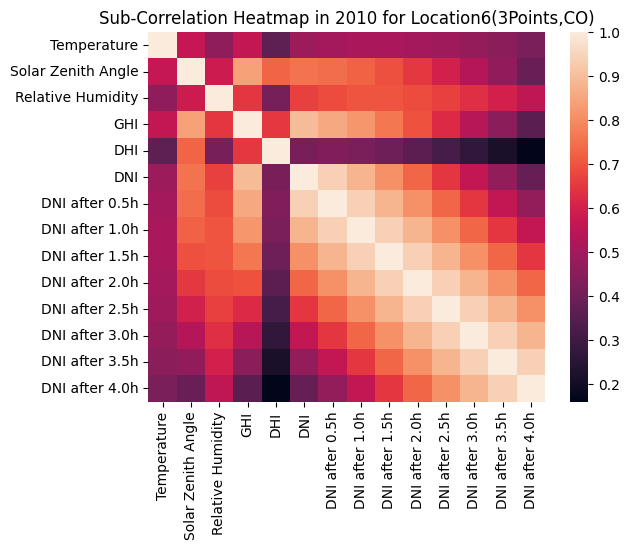

In [113]:
#plot the desired correlation matrix after removing all non-relevent features
for i in range(locs):
    plt.clf()
    corr_matrix = abs(sub_dfs[i].corr()) 
    dataplot = sns.heatmap(corr_matrix)
    # displaying heatmap
    plt.title('Sub-Correlation Heatmap in 2010 for {}'.format(text[i]))
    plt.show()

<Figure size 640x480 with 0 Axes>

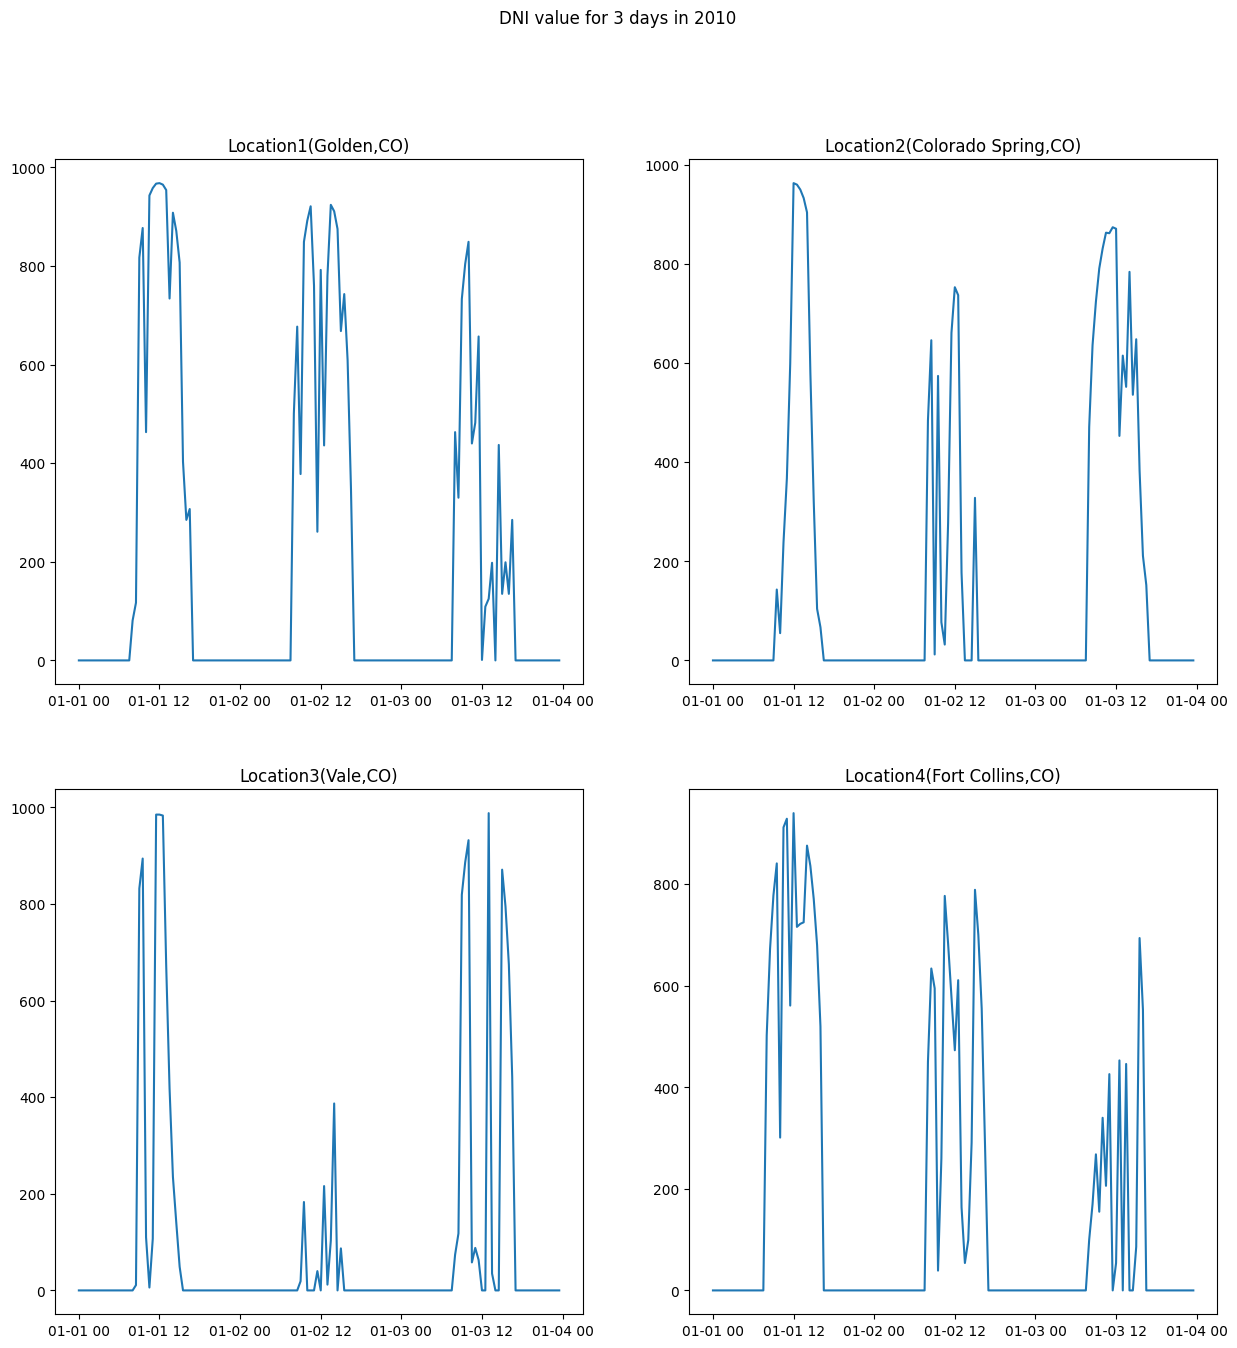

In [114]:
# plot a graph to show that DNI values are not consistent and very hard to predict
plt.clf()
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
plt.suptitle('DNI value for 3 days in 2010')
for i, ax in enumerate(axes.flat):
    ax.set_title(text[i])
    ax.plot(dfs[i].index[:48*3], dfs[i]['DNI'][:48*3])
    # plt.xticks(x=dfs[i].index[:48], rotation=45, ha='right')
plt.show()

<Figure size 640x480 with 0 Axes>

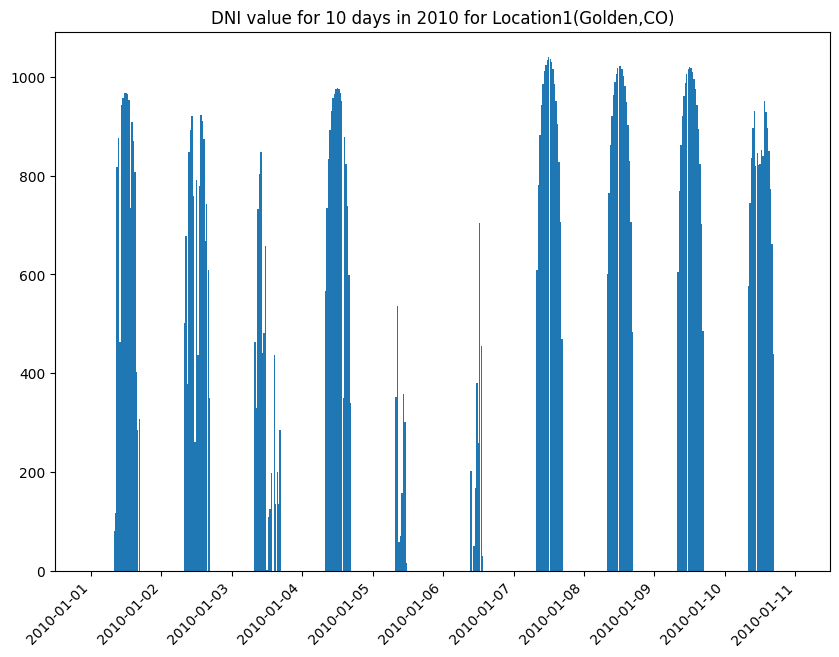

<Figure size 640x480 with 0 Axes>

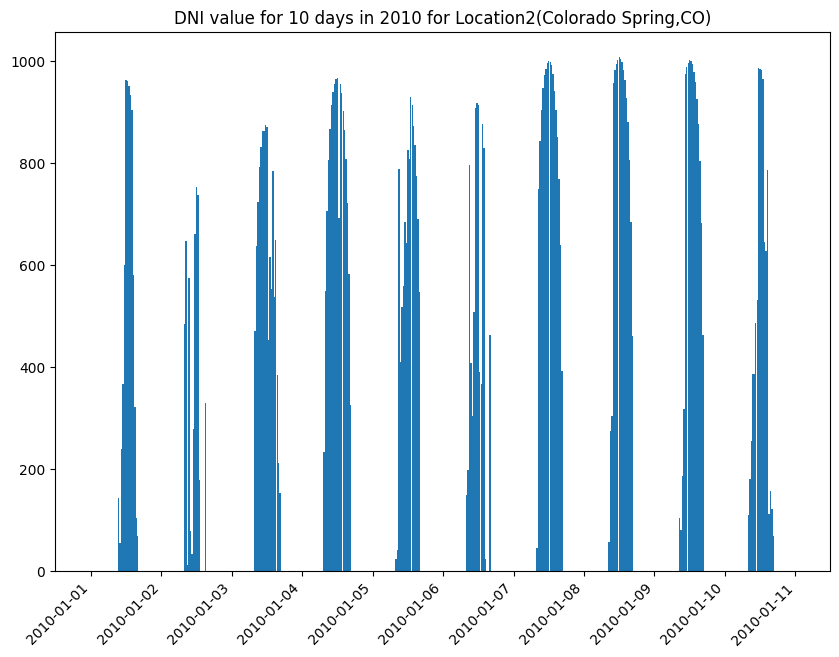

<Figure size 640x480 with 0 Axes>

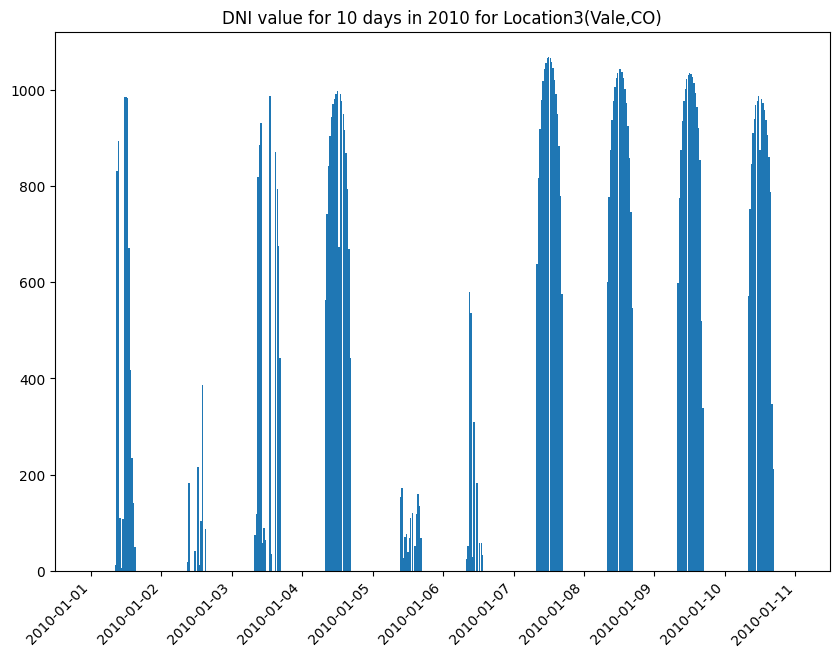

<Figure size 640x480 with 0 Axes>

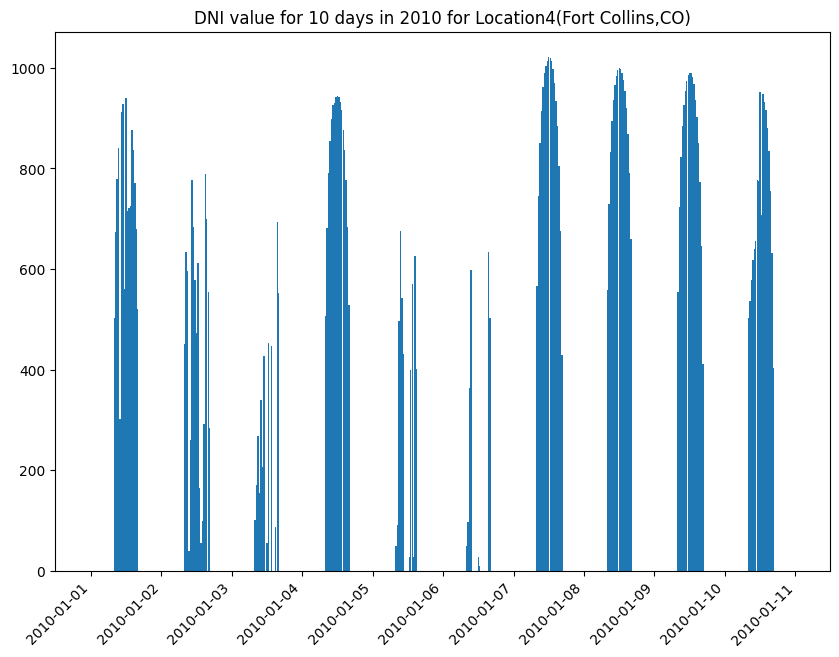

<Figure size 640x480 with 0 Axes>

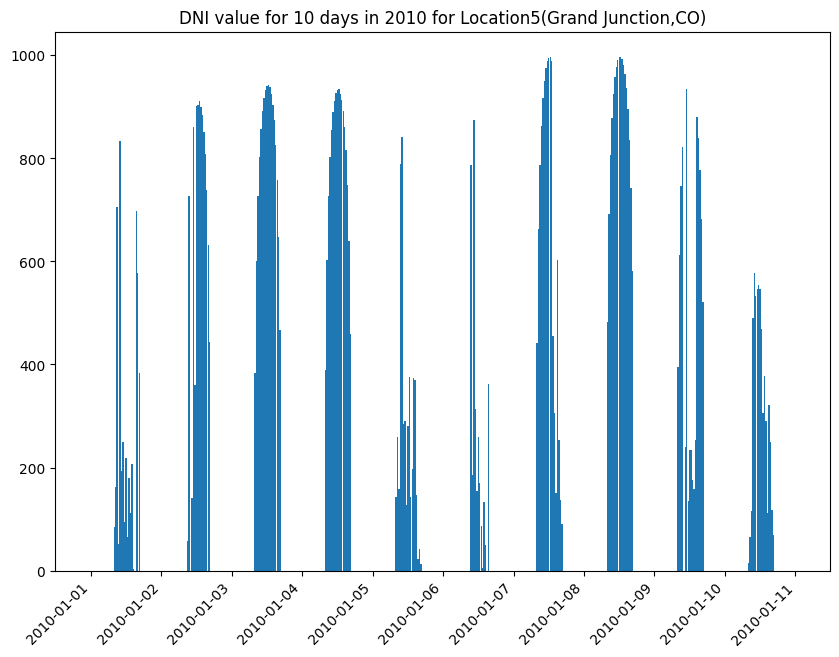

<Figure size 640x480 with 0 Axes>

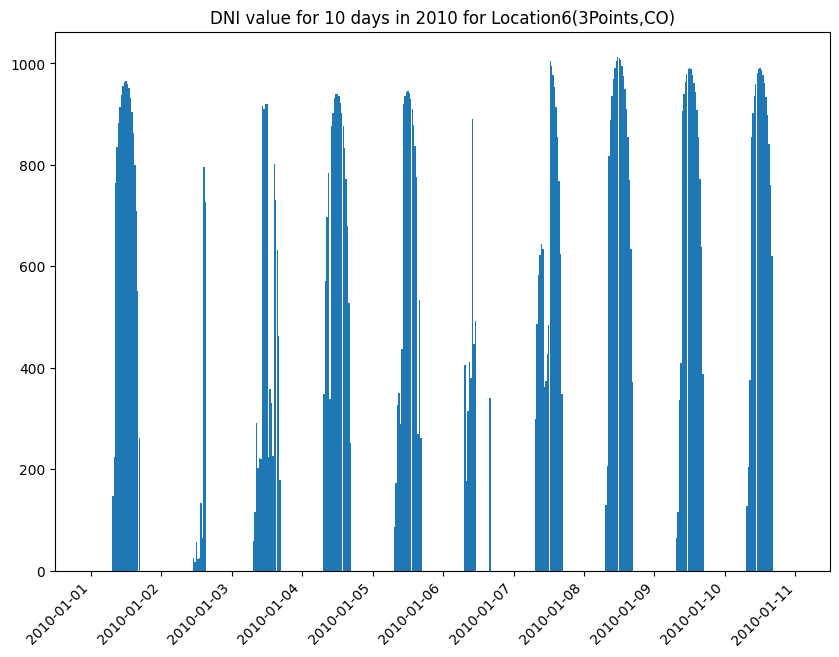

In [115]:
# plot a graph to show that DNI values during night time are always Zero
for i in range(locs):
    plt.clf()
    fig = plt.figure(figsize =(10, 7))
    plt.title('DNI value for 10 days in 2010 for {}'.format(text[i]))
    plt.bar(dfs[i].index[:480], dfs[i]['DNI'][:480], width=0.02)

    plt.xticks(x=dfs[i].index[:480], rotation=45, ha='right')
    plt.show()

In [116]:
# Re-constructing the data by using a sliding window 
win_size = 8    # window size of 8 samples (4 hours)
X_lst = []      # list to hold all the features for all the locations
Y_lst = []      # list to hold all the labels for all the locations

for i in range(locs):
    df_fetures = sub_dfs[i].iloc[:,:-8]     #:-8 ==> means we remove the future data

    X = np.zeros((df_fetures.shape[0] - win_size, win_size * df_fetures.shape[1]))      # initialize features array
    Y = np.zeros((df_fetures.shape[0] - win_size, 1))                                   #initialize labels array
    print("{}\nFeature array size:{}, Labels array size{}".format(text[i], X.shape, Y.shape))

    for j in range(X.shape[0]):
        chunk_x = df_fetures.iloc[j:j+win_size, :].to_numpy()               # sliding window chunck
        chunk_y = df_fetures.iloc[j+win_size, -1]
        X[j] = np.reshape(chunk_x, (1, df_fetures.shape[1] * win_size))     #flatting the chunks
        Y[j]= chunk_y

    X_lst.append(X)
    Y_lst.append(Y)


Location1(Golden,CO)
Feature array size:(17512, 48), Labels array size(17512, 1)
Location2(Colorado Spring,CO)
Feature array size:(17512, 48), Labels array size(17512, 1)
Location3(Vale,CO)
Feature array size:(17512, 48), Labels array size(17512, 1)
Location4(Fort Collins,CO)
Feature array size:(17512, 48), Labels array size(17512, 1)
Location5(Grand Junction,CO)
Feature array size:(17512, 48), Labels array size(17512, 1)
Location6(3Points,CO)
Feature array size:(17512, 48), Labels array size(17512, 1)


In [117]:
# Remove the labels that we are sure they have DNI of 0

for i in range(locs):
    zero_index = []
    for j in range(31, 50):     ## 31 means 7pm, and 50 means 5:30 am, consider the gap we have because the first 8 samples do
        zero_index = zero_index + list(range(j, Y_lst[i].shape[0], 48))
        # the time is periodic, every day has the exact same hours!
        ### examples:
        # zero1 = list(range(34, Y.shape[0], 48))    #10pm
        # # zero2 = list(range(35, Y.shape[0], 48))    #11pm

    print("{}\nnum of zero dni: ".format(text[i]), len(zero_index))
    print("This sum must be zeroo ==> ", np.sum(np.take(Y_lst[i], zero_index)))

    Y_lst[i] = np.delete(Y_lst[i], zero_index, axis=0)
    X_lst[i] = np.delete(X_lst[i], zero_index, axis=0)
    print("{}\nFeature array size:{}, Labels array size{}".format(text[i], X_lst[i].shape, Y_lst[i].shape))


Location1(Golden,CO)
num of zero dni:  6925
This sum must be zeroo ==>  0.0
Location1(Golden,CO)
Feature array size:(10587, 48), Labels array size(10587, 1)
Location2(Colorado Spring,CO)
num of zero dni:  6925
This sum must be zeroo ==>  0.0
Location2(Colorado Spring,CO)
Feature array size:(10587, 48), Labels array size(10587, 1)
Location3(Vale,CO)
num of zero dni:  6925
This sum must be zeroo ==>  0.0
Location3(Vale,CO)
Feature array size:(10587, 48), Labels array size(10587, 1)
Location4(Fort Collins,CO)
num of zero dni:  6925
This sum must be zeroo ==>  0.0
Location4(Fort Collins,CO)
Feature array size:(10587, 48), Labels array size(10587, 1)
Location5(Grand Junction,CO)
num of zero dni:  6925
This sum must be zeroo ==>  2109.0
Location5(Grand Junction,CO)
Feature array size:(10587, 48), Labels array size(10587, 1)
Location6(3Points,CO)
num of zero dni:  6925
This sum must be zeroo ==>  0.0
Location6(3Points,CO)
Feature array size:(10587, 48), Labels array size(10587, 1)


In [118]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.30

trainX_lst = []
valX_lst = []
testX_lst = []

trainY_lst = []
valY_lst = []
testY_lst = []

trainX_scaled_lst = []
valX_scaled_lst = []
testX_scaled_lst = []

for i in range(locs):
    # split the data for all the locations
    trainX, testX, trainY, testY = train_test_split(X, Y, test_size= 1 - train_ratio)
    valX, testX, valY, testY = train_test_split(testX, testY, test_size=test_ratio/(test_ratio + validation_ratio))
    
    sc=StandardScaler()
    scaler = sc.fit(trainX)
    trainX_scaled = scaler.transform(trainX)
    valX_scaled = scaler.transform(valX)
    testX_scaled = scaler.transform(testX)

    trainX_lst.append(trainX)
    valX_lst.append(valX)
    testX_lst.append(testX)
    
    trainY_lst.append(trainY)
    valY_lst.append(valY)
    testY_lst.append(testY)
    
    trainX_scaled_lst.append(trainX_scaled)
    valX_scaled_lst.append(valX_scaled)
    testX_scaled_lst.append(testX_scaled)
    
    print("=== {} ===".format(text[i]))
    print("trainx size: ", trainX_scaled.shape)
    print("valx size: ", valX_scaled.shape)
    print("testx size: ", testX_scaled.shape)
    print("==============")
    print("trainy size: ", trainY.shape)
    print("valy size: ", valY.shape)
    print("testy size: ", testY.shape)
    print("==============\n\n")

=== Location1(Golden,CO) ===
trainx size:  (12258, 48)
valx size:  (1751, 48)
testx size:  (3503, 48)
trainy size:  (12258, 1)
valy size:  (1751, 1)
testy size:  (3503, 1)


=== Location2(Colorado Spring,CO) ===
trainx size:  (12258, 48)
valx size:  (1751, 48)
testx size:  (3503, 48)
trainy size:  (12258, 1)
valy size:  (1751, 1)
testy size:  (3503, 1)


=== Location3(Vale,CO) ===
trainx size:  (12258, 48)
valx size:  (1751, 48)
testx size:  (3503, 48)
trainy size:  (12258, 1)
valy size:  (1751, 1)
testy size:  (3503, 1)


=== Location4(Fort Collins,CO) ===
trainx size:  (12258, 48)
valx size:  (1751, 48)
testx size:  (3503, 48)
trainy size:  (12258, 1)
valy size:  (1751, 1)
testy size:  (3503, 1)


=== Location5(Grand Junction,CO) ===
trainx size:  (12258, 48)
valx size:  (1751, 48)
testx size:  (3503, 48)
trainy size:  (12258, 1)
valy size:  (1751, 1)
testy size:  (3503, 1)


=== Location6(3Points,CO) ===
trainx size:  (12258, 48)
valx size:  (1751, 48)
testx size:  (3503, 48)
trainy

In [119]:
# construct a new features array to build one model that forcasts the dni for all the locations instead of building a model for each location
# Initializating arrays
big_trainX_scaled = np.zeros((trainX_scaled_lst[0].shape[0]*locs, trainX_scaled_lst[0].shape[1]))       
big_valX_scaled = np.zeros((valX_scaled_lst[0].shape[0]*locs, valX_scaled_lst[0].shape[1]))
big_testX_scaled = np.zeros((testX_scaled_lst[0].shape[0]*locs, testX_scaled_lst[0].shape[1]))

big_trainY = np.zeros((trainY_lst[0].shape[0]*locs, trainY_lst[0].shape[1]))
big_valY = np.zeros((valY_lst[0].shape[0]*locs, valY_lst[0].shape[1]))
big_testY = np.zeros((testY_lst[0].shape[0]*locs, testY_lst[0].shape[1]))

# populating arrays
for i in range(locs):
    big_trainX_scaled[i:i+trainX_scaled_lst[0].shape[0], :] = trainX_scaled_lst[i]
    big_valX_scaled[i:i+valX_scaled_lst[0].shape[0], :] = valX_scaled_lst[i]
    big_testX_scaled[i:i+testX_scaled_lst[0].shape[0], :] = testX_scaled_lst[i]
    
    big_trainY[i:i+trainY_lst[0].shape[0], :] = trainY_lst[i]
    big_valY[i:i+valY_lst[0].shape[0], :] = valY_lst[i]
    big_testY[i:i+testY_lst[0].shape[0], :] = testY_lst[i]


In [120]:
# let's try linear regression first
from sklearn import linear_model, metrics

y_pred_linreg_lst = []

for i in range(locs): 
    # Create linear regression object
    regr = linear_model.LinearRegression()
    
    # Train the model using the training sets
    regr.fit(trainX_scaled_lst[i], trainY_lst[i])
    
    # Make predictions using the testing set
    y_pred_linreg = regr.predict(testX_scaled_lst[i])
    y_pred_linreg_lst.append(y_pred_linreg)
    
    print("=== {} ===".format(text[i]))
    print('Mean Absolute Error:', metrics.mean_absolute_error(testY_lst[i], y_pred_linreg_lst[i]))
    print('Mean Squared Error:', metrics.mean_squared_error(testY_lst[i], y_pred_linreg_lst[i]))
    print('Root Mean Squared Error:', metrics.mean_squared_error(testY_lst[i], y_pred_linreg_lst[i], squared=False))
    print("=======\n")


=== Location1(Golden,CO) ===
Mean Absolute Error: 59.007753660050184
Mean Squared Error: 12549.86147458599
Root Mean Squared Error: 112.02616424115391

=== Location2(Colorado Spring,CO) ===
Mean Absolute Error: 57.835648218368924
Mean Squared Error: 11327.06881142641
Root Mean Squared Error: 106.42870294909362

=== Location3(Vale,CO) ===
Mean Absolute Error: 59.91998703822627
Mean Squared Error: 12607.849077235884
Root Mean Squared Error: 112.28467872882695

=== Location4(Fort Collins,CO) ===
Mean Absolute Error: 60.267645246903434
Mean Squared Error: 12517.78166579068
Root Mean Squared Error: 111.8828926413269

=== Location5(Grand Junction,CO) ===
Mean Absolute Error: 60.48154089518346
Mean Squared Error: 13012.843040547972
Root Mean Squared Error: 114.07384906519097

=== Location6(3Points,CO) ===
Mean Absolute Error: 58.70234133754035
Mean Squared Error: 11928.585509175264
Root Mean Squared Error: 109.21806402411308



In [121]:
# Try SVR with poly kernel
from sklearn.svm import SVR

y_pred_svr_lst = []

for i in range(locs):
    # create object
    regressor = SVR(kernel='poly')

    # Train the model using the training sets
    regressor.fit(trainX_scaled_lst[i],trainY_lst[i])
    
    # Make predictions using the testing set
    y_pred_svr = regressor.predict(testX_scaled_lst[i])
    y_pred_svr_lst.append(y_pred_svr)
    
    print("=== {} ===".format(text[i]))
    print('Mean Absolute Error:', metrics.mean_absolute_error(testY_lst[i], y_pred_svr_lst[i]))
    print('Mean Squared Error:', metrics.mean_squared_error(testY_lst[i], y_pred_svr_lst[i]))
    print('Root Mean Squared Error:', metrics.mean_squared_error(testY_lst[i], y_pred_svr_lst[i], squared=False))
    print("=======\n")



/Users/saraabouelella/anaconda3/envs/nrel311/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


=== Location1(Golden,CO) ===
Mean Absolute Error: 138.66804257190947
Mean Squared Error: 59144.224721621715
Root Mean Squared Error: 243.19585671146152



/Users/saraabouelella/anaconda3/envs/nrel311/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


=== Location2(Colorado Spring,CO) ===
Mean Absolute Error: 143.0983746506255
Mean Squared Error: 61616.91240857448
Root Mean Squared Error: 248.22754159958657



/Users/saraabouelella/anaconda3/envs/nrel311/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


=== Location3(Vale,CO) ===
Mean Absolute Error: 142.65426966082717
Mean Squared Error: 60756.4895870151
Root Mean Squared Error: 246.48831531538184



/Users/saraabouelella/anaconda3/envs/nrel311/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


=== Location4(Fort Collins,CO) ===
Mean Absolute Error: 146.07034254112017
Mean Squared Error: 63333.85344547755
Root Mean Squared Error: 251.66218119828324



/Users/saraabouelella/anaconda3/envs/nrel311/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


=== Location5(Grand Junction,CO) ===
Mean Absolute Error: 143.53092620359482
Mean Squared Error: 62374.38099024343
Root Mean Squared Error: 249.74863561237612



/Users/saraabouelella/anaconda3/envs/nrel311/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


=== Location6(3Points,CO) ===
Mean Absolute Error: 137.75399286341357
Mean Squared Error: 57382.67396422402
Root Mean Squared Error: 239.54680954716142



In [122]:
# prepare for neural network

input_shape = trainX_lst[0].shape[1]
n_batch_size = 200

n_steps_per_epoch = int(trainX_lst[0].shape[0] / n_batch_size)
n_validation_steps = int(valX_lst[0].shape[0] / n_batch_size)
n_test_steps = int(testX_lst[0].shape[0] / n_batch_size)
n_epochs = 150


print('Input Shape:{} '.format(input_shape))
print('Batch Size:{}'.format(n_batch_size))
print('Steps per Epoch:{}'.format(n_steps_per_epoch))
print('Validation Steps:{}'.format(n_validation_steps))
print('Test Steps:{}'.format(n_test_steps))
print('Number of Epochs:{}'.format(n_epochs))


Input Shape:48 
Batch Size:200
Steps per Epoch:61
Validation Steps:8
Test Steps:17
Number of Epochs:150


In [123]:
# prepare for 1 model to take all the data from all locations

big_input_shape = big_trainX.shape[1]
n_batch_size = 200

big_n_steps_per_epoch = int(big_trainX.shape[0] / n_batch_size)
big_n_validation_steps = int(big_valX.shape[0] / n_batch_size)
big_n_test_steps = int(big_testX.shape[0] / n_batch_size)
n_epochs = 150


print('BIG Input Shape:{} '.format(big_input_shape))
print('BIG Batch Size:{}'.format(n_batch_size))
print('BIG Steps per Epoch:{}'.format(big_n_steps_per_epoch))
print('BIG Validation Steps:{}'.format(big_n_validation_steps))
print('BIG Test Steps:{}'.format(big_n_test_steps))
print('BIG Number of Epochs:{}'.format(n_epochs))

BIG Input Shape:48 
BIG Batch Size:200
BIG Steps per Epoch:222
BIG Validation Steps:31
BIG Test Steps:63
BIG Number of Epochs:150


In [124]:
import os
import shutil
import pickle as pk

from keras import models
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model

from sklearn import metrics

In [125]:
# ANN model with 2 hidden layers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(input_shape,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(loss='mse', optimizer='adam', metrics=['mae'])
    return model

In [126]:
build_model().summary()

Model: "sequential_156"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_468 (Dense)           (None, 64)                3136      
                                                                 
 dense_469 (Dense)           (None, 64)                4160      
                                                                 
 dense_470 (Dense)           (None, 1)                 65        
                                                                 
Total params: 7361 (28.75 KB)
Trainable params: 7361 (28.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# store history to pick the best model
history_lst = []
checkpoint_no_lst = []
model_name_lst = []
for i in range(locs):
    model = build_model()
    model.compile(loss='mse', optimizer='adam', metrics=['mae'])
    # Prepare a directory to store all the checkpoints.
    checkpoint_no = 'ckpoints/ckpt_{}_ANN'.format(i+1)
    model_name = 'dnl_forcast_ANN{}'.format(i+1)
    checkpoint_no_lst.append(checkpoint_no)
    model_name_lst.append(model_name)
    checkpoint_dir = './'+ checkpoint_no
    if not os.path.exists(checkpoint_dir):
        os.makedirs(checkpoint_dir)
    keras_callbacks = [ModelCheckpoint(filepath = checkpoint_dir + '/' + model_name, monitor='val_loss', save_best_only=True, mode='auto')]
    
    history = model.fit(trainX_scaled_lst[i],
                    trainY_lst[i],
                    steps_per_epoch=n_steps_per_epoch,
                    epochs=n_epochs,
                    batch_size=n_batch_size,
                    validation_data=(valX_scaled_lst[i], valY_lst[i]),
                    validation_steps=n_validation_steps,
                    callbacks=[keras_callbacks], verbose=0 )


    hist_df = pd.DataFrame(history.history)
    hist_df['epoch'] = hist_df.index + 1
    cols = list(hist_df.columns)
    cols = [cols[-1]] + cols[:-1]
    hist_df = hist_df[cols]
    hist_df.to_csv(checkpoint_no + '/' + 'history_df_' + model_name + '.csv')

    values_of_best_model = hist_df[hist_df.val_loss == hist_df.val_loss.min()]

    pk.dump(scaler, open(checkpoint_no + '/' + 'scaler.pkl', 'wb'))

    
    history_lst.append(history)
values_of_best_model

In [ ]:
# Repeat the same for the big model
big_model = build_model()
big_model.compile(loss='mse', optimizer='adam', metrics=['mae'])

# Prepare a directory to store all the checkpoints.
big_checkpoint_no = 'ckpoints/ckpt_big_ANN'
big_model_name = 'dnl_forcast_ANN_big'
big_checkpoint_dir = './'+ big_checkpoint_no
if not os.path.exists(big_checkpoint_dir):
    os.makedirs(big_checkpoint_dir)

keras_callbacks = [ModelCheckpoint(filepath = big_checkpoint_dir + '/' + big_model_name, monitor='val_loss', save_best_only=True, mode='auto')]
    
big_history = big_model.fit(big_trainX_scaled, big_trainY,
                    steps_per_epoch=big_n_steps_per_epoch,
                    epochs=n_epochs,
                    batch_size=n_batch_size,
                    validation_data=(big_valX_scaled, big_valY),
                    validation_steps=big_n_validation_steps,
                    callbacks=[keras_callbacks], verbose=0 )


big_hist_df = pd.DataFrame(big_history.history)
big_hist_df['epoch'] = big_hist_df.index + 1
cols = list(big_hist_df.columns)
cols = [cols[-1]] + cols[:-1]
big_hist_df = big_hist_df[cols]
big_hist_df.to_csv(big_checkpoint_no + '/' + 'history_df_' + big_model_name + '.csv')

big_values_of_best_model = big_hist_df[big_hist_df.val_loss == big_hist_df.val_loss.min()]

pk.dump(scaler, open(big_checkpoint_no + '/' + 'scaler.pkl', 'wb'))


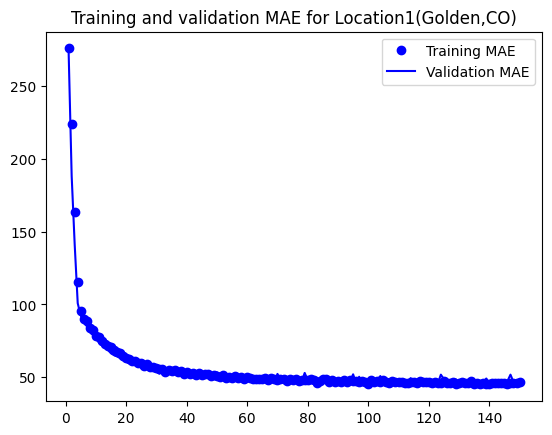

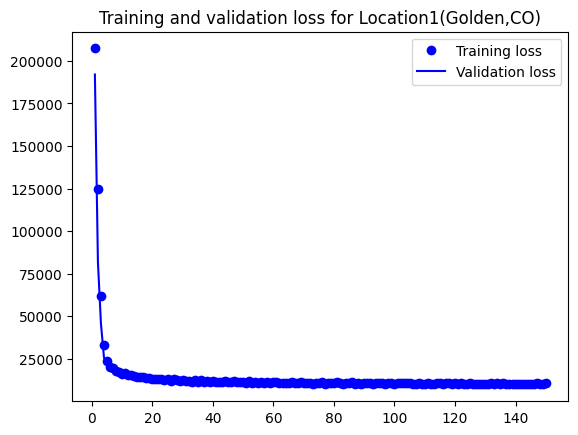

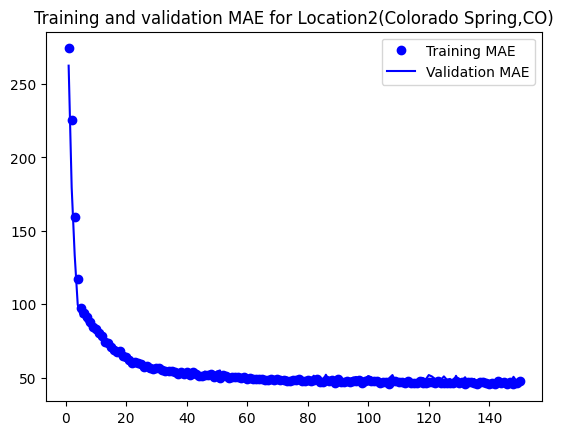

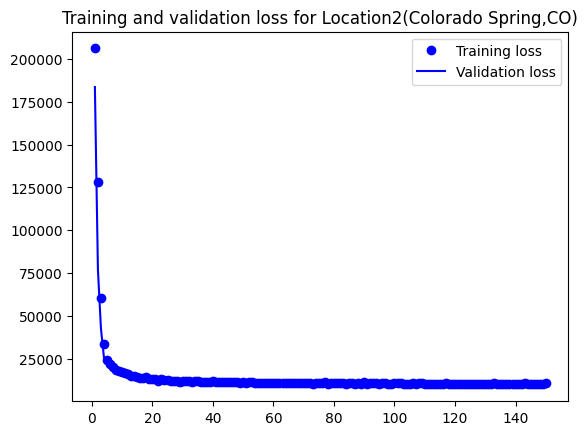

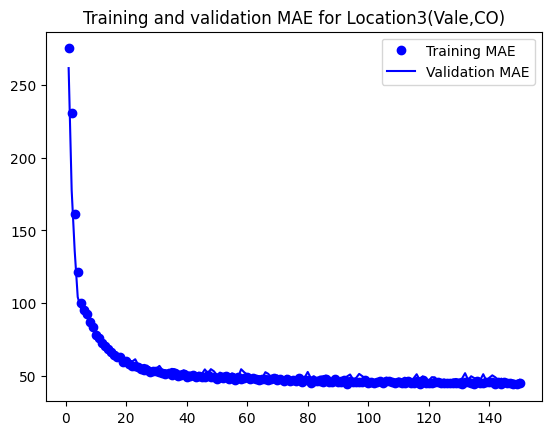

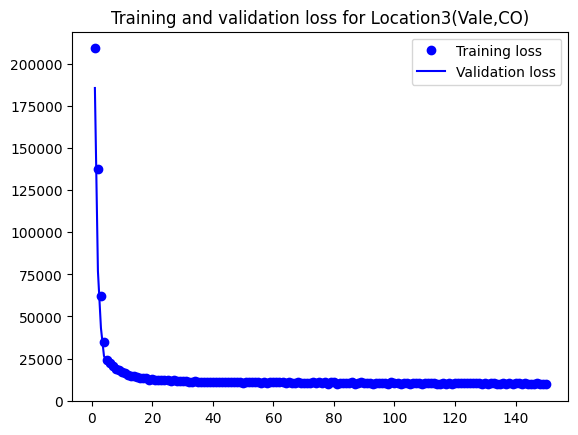

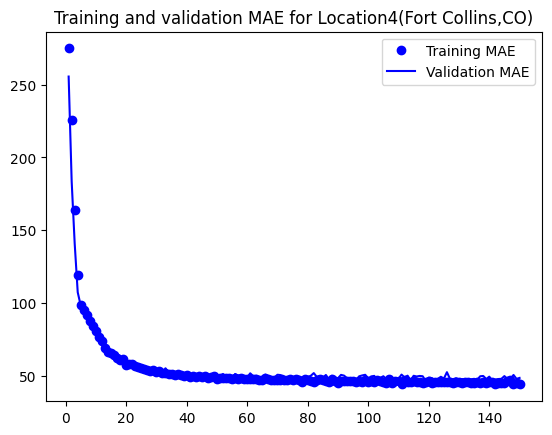

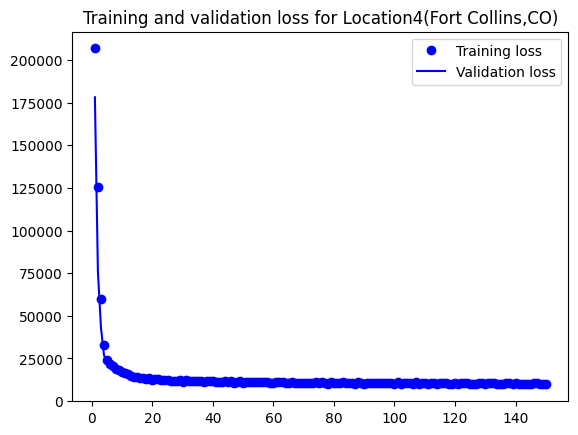

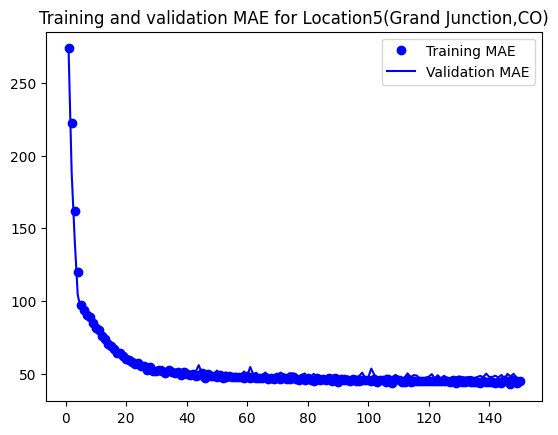

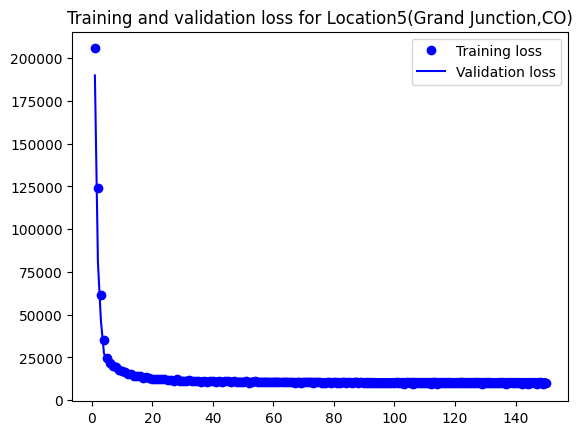

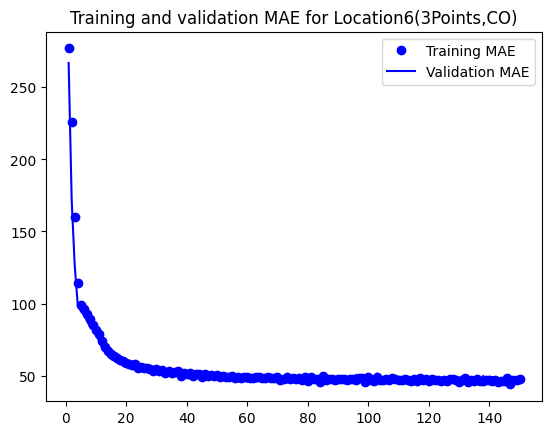

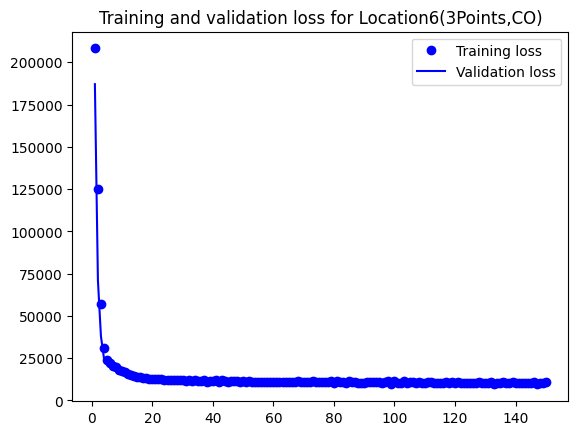

In [129]:
# plot some training/validation curves
for i in range(locs):
    mae = history_lst[i].history['mae']
    val_mae = history_lst[i].history['val_mae']
    loss = history_lst[i].history['loss']
    val_loss = history_lst[i].history['val_loss']
    
    epochs = range(1, len(mae) + 1)
    plt.clf()
    plt.plot(epochs, mae, 'bo', label='Training MAE')
    plt.plot(epochs, val_mae, 'b', label='Validation MAE')
    plt.title('Training and validation MAE for {}'.format(text[i]))
    plt.legend()
    
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss for {}'.format(text[i]))
    plt.legend()
    
    plt.show()

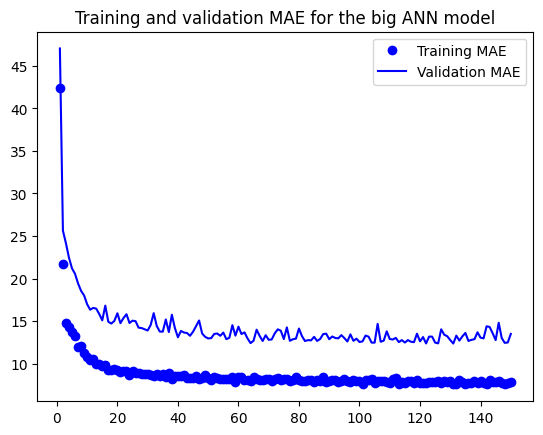

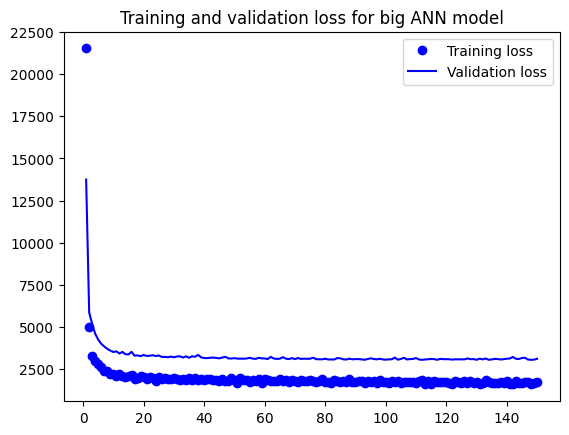

In [130]:
big_mae = big_history.history['mae']
big_val_mae = big_history.history['val_mae']
big_loss = big_history.history['loss']
big_val_loss = big_history.history['val_loss']
    
epochs = range(1, len(big_mae) + 1)
plt.clf()
plt.plot(epochs, big_mae, 'bo', label='Training MAE')
plt.plot(epochs, big_val_mae, 'b', label='Validation MAE')
plt.title('Training and validation MAE for the big ANN model')
plt.legend()
    
plt.figure()
plt.plot(epochs, big_loss, 'bo', label='Training loss')
plt.plot(epochs, big_val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss for big ANN model')
plt.legend()
    
plt.show()

In [131]:
#cross validation
k = 5   #k cross validation (folds)
all_scores_lst = []
num_val_samples = len(trainX_lst[0]) // k
for i in range(locs):
    all_scores = []
    for j in range(k):
        print('Processing Fold', j)
        val_data = trainX_scaled_lst[i][j * num_val_samples: (j + 1) * num_val_samples]
        val_targets = trainY_lst[i][j * num_val_samples: (j + 1) * num_val_samples]

        partial_train_data = np.concatenate([trainX_scaled_lst[i][:j * num_val_samples], trainX_scaled_lst[i][(j + 1) * num_val_samples:]], axis=0)
        
        partial_train_targets = np.concatenate([trainY_lst[i][:j * num_val_samples], trainY_lst[i][(j + 1) * num_val_samples:]], axis=0)

        model = build_model()
        model.fit(partial_train_data, partial_train_targets, epochs=n_epochs, batch_size=n_batch_size, verbose=0)
        val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
        all_scores.append(val_mae)
        print('MAE: ' + str(val_mae))
        print('========================')
    all_scores_lst.append(all_scores)


Processing Fold 0
MAE: 44.45867919921875
Processing Fold 1
MAE: 49.78807830810547
Processing Fold 2
MAE: 51.644508361816406
Processing Fold 3
MAE: 48.162750244140625
Processing Fold 4
MAE: 48.370357513427734
Processing Fold 0
MAE: 48.13896942138672
Processing Fold 1
MAE: 46.20417022705078
Processing Fold 2
MAE: 48.98955154418945
Processing Fold 3
MAE: 48.710811614990234
Processing Fold 4
MAE: 47.735313415527344
Processing Fold 0
MAE: 46.695716857910156
Processing Fold 1
MAE: 48.334259033203125
Processing Fold 2
MAE: 47.86457824707031
Processing Fold 3
MAE: 47.61911392211914
Processing Fold 4
MAE: 44.372772216796875
Processing Fold 0
MAE: 47.06502914428711
Processing Fold 1
MAE: 40.9683952331543
Processing Fold 2
MAE: 47.00619888305664
Processing Fold 3
MAE: 49.40718078613281
Processing Fold 4
MAE: 46.168235778808594
Processing Fold 0
MAE: 45.002197265625
Processing Fold 1
MAE: 45.21564483642578
Processing Fold 2
MAE: 47.92988967895508
Processing Fold 3
MAE: 49.20930480957031
Processing

In [132]:
# cross validation for the 1 big model
k = 5
big_num_val_samples = len(big_trainX) // k
big_all_scores = []
for j in range(k):
    print('Processing Fold', j)
    big_val_data = big_trainX_scaled[j * big_num_val_samples: (j + 1) * big_num_val_samples]
    big_val_targets = big_trainY[j * big_num_val_samples: (j + 1) * big_num_val_samples]

    big_partial_train_data = np.concatenate([big_trainX_scaled[:j * big_num_val_samples], big_trainX_scaled[(j + 1) * big_num_val_samples:]], axis=0)
        
    big_partial_train_targets = np.concatenate([big_trainY[:j * big_num_val_samples], big_trainY[(j + 1) * big_num_val_samples:]], axis=0)

    big_model = build_model()
    big_model.fit(big_partial_train_data, big_partial_train_targets, epochs=n_epochs, batch_size=n_batch_size, verbose=0)
    big_val_mse, big_val_mae = big_model.evaluate(big_val_data, big_val_targets, verbose=0)
    big_all_scores.append(val_mae)
    print('MAE: ' + str(val_mae))
    print('========================')
    

Processing Fold 0
MAE: 47.82139587402344
Processing Fold 1
MAE: 47.82139587402344
Processing Fold 2
MAE: 47.82139587402344
Processing Fold 3
MAE: 47.82139587402344
Processing Fold 4
MAE: 47.82139587402344


In [133]:
#print some results
for i in range(locs):
    for j, val in enumerate(all_scores_lst[i]):
        print('Fold ' + str(j) +': ' + 'MAE of', val)
    print('Mean MAE of all folds {}: '.format(text[i]) + str(np.mean(all_scores_lst[i])))
    print("================")

Fold 0: MAE of 44.45867919921875
Fold 1: MAE of 49.78807830810547
Fold 2: MAE of 51.644508361816406
Fold 3: MAE of 48.162750244140625
Fold 4: MAE of 48.370357513427734
Mean MAE of all folds Location1(Golden,CO): 48.4848747253418
Fold 0: MAE of 48.13896942138672
Fold 1: MAE of 46.20417022705078
Fold 2: MAE of 48.98955154418945
Fold 3: MAE of 48.710811614990234
Fold 4: MAE of 47.735313415527344
Mean MAE of all folds Location2(Colorado Spring,CO): 47.955763244628905
Fold 0: MAE of 46.695716857910156
Fold 1: MAE of 48.334259033203125
Fold 2: MAE of 47.86457824707031
Fold 3: MAE of 47.61911392211914
Fold 4: MAE of 44.372772216796875
Mean MAE of all folds Location3(Vale,CO): 46.97728805541992
Fold 0: MAE of 47.06502914428711
Fold 1: MAE of 40.9683952331543
Fold 2: MAE of 47.00619888305664
Fold 3: MAE of 49.40718078613281
Fold 4: MAE of 46.168235778808594
Mean MAE of all folds Location4(Fort Collins,CO): 46.12300796508789
Fold 0: MAE of 45.002197265625
Fold 1: MAE of 45.21564483642578
Fold 2:

In [134]:
#print some results
for j, val in enumerate(big_all_scores):
    print('Fold ' + str(j) +': ' + 'MAE of', val)
    print('Mean MAE of all folds big model: ' + str(np.mean(big_all_scores)))
    print("================")

Fold 0: MAE of 47.82139587402344
Mean MAE of all folds big model: 47.82139587402344
Fold 1: MAE of 47.82139587402344
Mean MAE of all folds big model: 47.82139587402344
Fold 2: MAE of 47.82139587402344
Mean MAE of all folds big model: 47.82139587402344
Fold 3: MAE of 47.82139587402344
Mean MAE of all folds big model: 47.82139587402344
Fold 4: MAE of 47.82139587402344
Mean MAE of all folds big model: 47.82139587402344


In [135]:
#fit the 6 models
all_mae_histories_lst = []
for i in range(locs):
    all_mae_histories = []
    for j in range(k):
        print('Processing Fold', j)
        val_data = trainX_scaled_lst[i][j * num_val_samples: (j + 1) * num_val_samples]
        val_targets = trainY_lst[i][j * num_val_samples: (j + 1) * num_val_samples]
        partial_train_data = np.concatenate([trainX_scaled_lst[i][:j * num_val_samples], trainX_scaled_lst[i][(j + 1) * num_val_samples:]],axis=0)
        
        partial_train_targets = np.concatenate([trainY_lst[i][:j * num_val_samples], trainY_lst[i][(j + 1) * num_val_samples:]], axis=0)
        
        model = build_model()
        history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=n_epochs, batch_size=n_batch_size, verbose=0)
        mae_history = history.history['val_mae']
        all_mae_histories.append(mae_history)
    
    all_mae_histories_lst.append(all_mae_histories)

Processing Fold 0
Processing Fold 1
Processing Fold 2
Processing Fold 3
Processing Fold 4
Processing Fold 0
Processing Fold 1
Processing Fold 2
Processing Fold 3
Processing Fold 4
Processing Fold 0
Processing Fold 1
Processing Fold 2
Processing Fold 3
Processing Fold 4
Processing Fold 0
Processing Fold 1
Processing Fold 2
Processing Fold 3
Processing Fold 4
Processing Fold 0
Processing Fold 1
Processing Fold 2
Processing Fold 3
Processing Fold 4
Processing Fold 0
Processing Fold 1
Processing Fold 2
Processing Fold 3
Processing Fold 4


In [136]:
# fit the one model
big_all_mae_histories = []
for j in range(k):
    print('Processing Fold', j)
    big_val_data = big_trainX_scaled[j * big_num_val_samples: (j + 1) * big_num_val_samples]
    big_val_targets = big_trainY[j * big_num_val_samples: (j + 1) * big_num_val_samples]
    big_partial_train_data = np.concatenate([big_trainX_scaled[:j * big_num_val_samples], big_trainX_scaled[(j + 1) * big_num_val_samples:]],axis=0)
        
    big_partial_train_targets = np.concatenate([big_trainY[:j * big_num_val_samples], big_trainY[(j + 1) * big_num_val_samples:]], axis=0)
        
    big_model = build_model()
    big_history = big_model.fit(big_partial_train_data, big_partial_train_targets, validation_data=(big_val_data, big_val_targets),
                epochs=n_epochs, batch_size=n_batch_size, verbose=0)
    big_mae_history = big_history.history['val_mae']
    big_all_mae_histories.append(big_mae_history)
    

Processing Fold 0
Processing Fold 1
Processing Fold 2
Processing Fold 3
Processing Fold 4


In [137]:
average_mae_history_lst = []
for i in range(locs):
    average_mae_history = [np.mean([x[j] for x in all_mae_histories_lst[i]]) for j in range(n_epochs)]
    average_mae_history_lst.append(average_mae_history)
    print(len(average_mae_history))

150
150
150
150
150
150


In [138]:
big_average_mae_history = [np.mean([x[j] for x in big_all_mae_histories]) for j in range(n_epochs)]
print(len(big_average_mae_history))

150


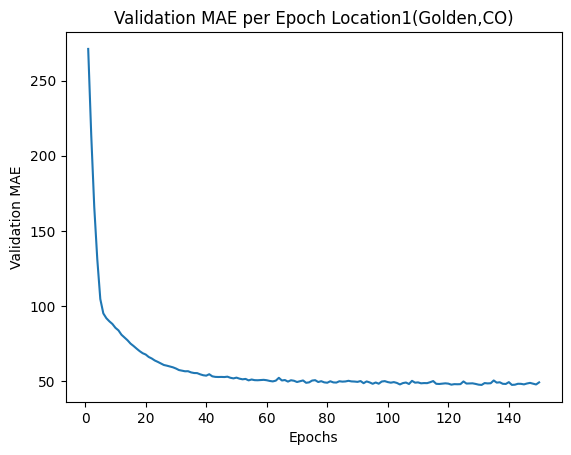

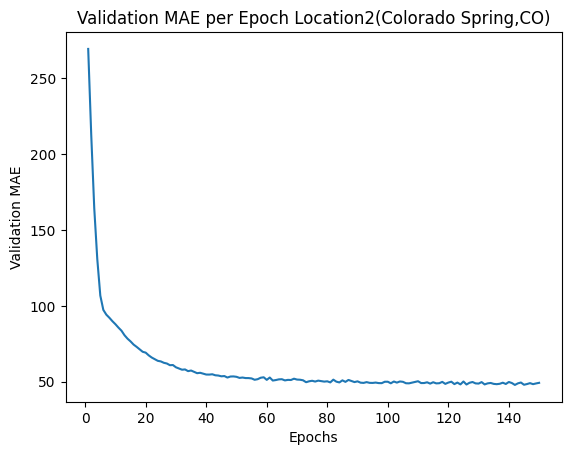

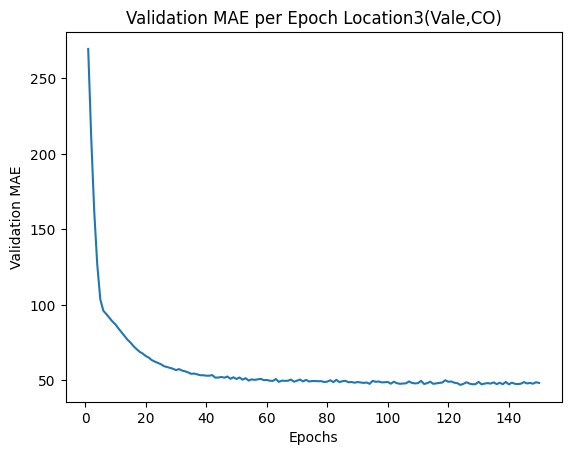

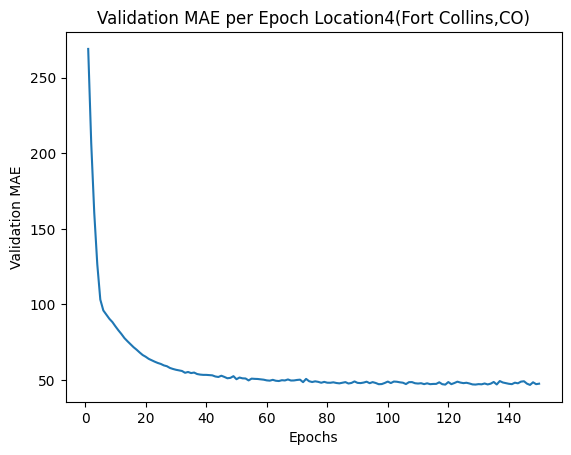

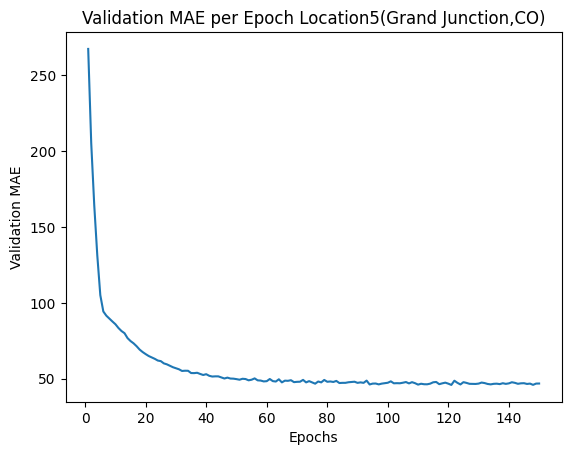

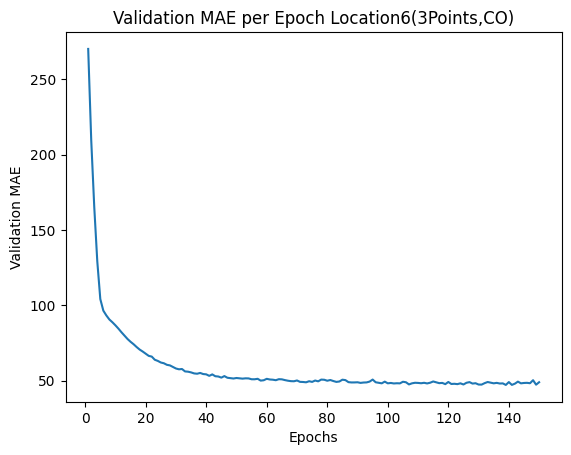

In [139]:
# validation curves
for i in range(locs):
    plt.clf()
    plt.plot(range(1, len(average_mae_history_lst[i]) + 1), average_mae_history_lst[i])
    plt.title('Validation MAE per Epoch {}'.format(text[i]))
    plt.xlabel('Epochs')
    plt.ylabel('Validation MAE')
    plt.show()

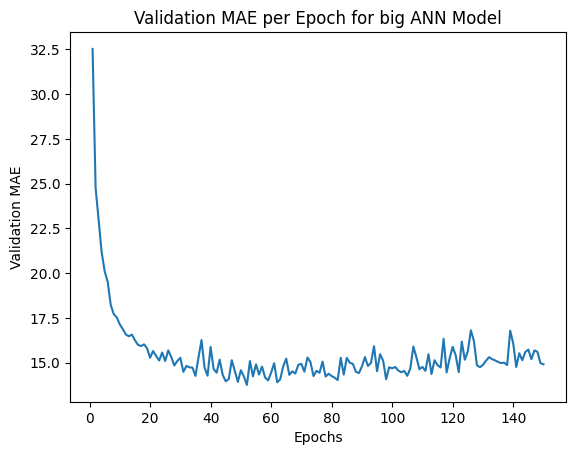

In [140]:
plt.clf()
plt.plot(range(1, len(big_average_mae_history) + 1), big_average_mae_history)
plt.title('Validation MAE per Epoch for big ANN Model')
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [141]:
#Get the best model
best_model_lst = []
for i in range(locs):
    model_reloaded = load_model(checkpoint_no_lst[i] + '/' + model_name_lst[i])
    
    # Saving the best model in the correct path and format
    root_directory = os.getcwd()
    checkpoint_dir = os.path.join(root_directory, checkpoint_no_lst[i])
    model_name_temp = os.path.join(checkpoint_dir, model_name_lst[i] + '.h5')
    model_reloaded.save(model_name_temp)
    
    # Deletion of the automatically created folder under Model Checkpoint File.
    folder_name_temp = os.path.join(checkpoint_dir, model_name_lst[i])
    shutil.rmtree(folder_name_temp, ignore_errors=True)
    best_model = load_model(model_name_temp)
    best_model_lst.append(best_model)

/Users/saraabouelella/anaconda3/envs/nrel311/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
/Users/saraabouelella/anaconda3/envs/nrel311/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
/Users/saraabouelella/anaconda3/envs/nrel311/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.s

In [142]:
# load the best model
big_model_reloaded = load_model(big_checkpoint_no + '/' + big_model_name)
    
# Saving the best model in the correct path and format
root_directory = os.getcwd()
big_checkpoint_dir = os.path.join(root_directory, big_checkpoint_no)
big_model_name_temp = os.path.join(big_checkpoint_dir, big_model_name + '.h5')
big_model_reloaded.save(big_model_name_temp)
    
# Deletion of the automatically created folder under Model Checkpoint File.
folder_name_temp = os.path.join(big_checkpoint_dir, big_model_name)
shutil.rmtree(folder_name_temp, ignore_errors=True)
big_best_model = load_model(big_model_name_temp)


/Users/saraabouelella/anaconda3/envs/nrel311/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [143]:
# best model evaluation
test_loss_lst = []
test_mae_lst = []
for i in range(locs):
    test_loss, test_mae = best_model_lst[i].evaluate(testX_scaled_lst[i], testY_lst[i], steps=n_test_steps)
    test_loss_lst.append(test_loss)
    test_mae_lst.append(test_mae)
    print()
    print('Test MAE {}:'.format(text[i]), test_mae)

17/17 [==============================] - 0s 511us/step - loss: 10792.2139 - mae: 45.5594

Test MAE Location1(Golden,CO): 45.55939483642578
17/17 [==============================] - 0s 482us/step - loss: 10158.2354 - mae: 45.5541

Test MAE Location2(Colorado Spring,CO): 45.55410385131836
17/17 [==============================] - 0s 485us/step - loss: 11013.9824 - mae: 47.6666

Test MAE Location3(Vale,CO): 47.666587829589844
17/17 [==============================] - 0s 484us/step - loss: 10875.9609 - mae: 47.1636

Test MAE Location4(Fort Collins,CO): 47.163631439208984
17/17 [==============================] - 0s 509us/step - loss: 11306.5576 - mae: 47.9623

Test MAE Location5(Grand Junction,CO): 47.962276458740234
17/17 [==============================] - 0s 474us/step - loss: 10238.3193 - mae: 46.5315

Test MAE Location6(3Points,CO): 46.53154373168945


In [144]:
#best model evaluation
big_test_loss, big_test_mae = big_best_model.evaluate(big_testX_scaled, big_testY, steps=n_test_steps)
print()
print('Test MAE for big ANN Model:', big_test_mae)

17/17 [==============================] - 0s 682us/step - loss: 1687.4886 - mae: 7.6450

Test MAE for big ANN Model: 7.645002841949463


In [145]:
# getting the labels using best models
y_pred_ann_lst = []
for i in range(locs):
    y_pred = best_model_lst[i].predict(testX_scaled_lst[i])
    y_pred_ann_lst.append(y_pred)
    
y_pred_ann_lst[0][:5]

110/110 [==============================] - 0s 291us/step


array([[791.7065   ],
       [866.0035   ],
       [364.5677   ],
       [ -6.2342334],
       [  6.040231 ]], dtype=float32)

In [146]:
# getting the labels using the best model (One for all the data)
big_y_pred_ann_lst = []

for i in range(locs):
    # here we use testX_scaled_lst not big_testX_scaled because we need to predict the labels for each location seperatly
    y_pred = big_best_model.predict(testX_scaled_lst[i])

    # append the result into a big lst to use later
    big_y_pred_ann_lst.append(y_pred)
           
big_y_pred_ann_lst[0][:5]

110/110 [==============================] - 0s 299us/step


array([[777.9697   ],
       [848.2351   ],
       [322.40836  ],
       [  7.3731856],
       [  6.0101027]], dtype=float32)

In [147]:
df_results_lst = []
for i in range(locs):
    df_testY = pd.DataFrame(testY_lst[i])
    df_y_pred = pd.DataFrame(y_pred_ann_lst[0])
    
    df_testY.reset_index(drop=True, inplace=True)
    df_y_pred.reset_index(drop=True, inplace=True)
    df_results = pd.concat([df_testY, df_y_pred], axis=1)
    df_results.columns = ['Actual', 'Predicted']
    df_results_lst.append(df_results)

df_results_lst[4]

,Actual,Predicted
0,0.0,791.706482
1,731.0,866.003479
2,416.0,364.567688
3,34.0,-6.234233
4,0.0,6.040231
...,...,...
3498,0.0,27.339916
3499,0.0,17.198116
3500,483.0,24.368271
3501,0.0,9.678452


In [148]:
big_df_results_lst = []
for i in range(locs):
    df_testY = pd.DataFrame(testY_lst[i])
    df_y_pred = pd.DataFrame(big_y_pred_ann_lst[0])
    
    df_testY.reset_index(drop=True, inplace=True)
    df_y_pred.reset_index(drop=True, inplace=True)
    df_results = pd.concat([df_testY, df_y_pred], axis=1)
    df_results.columns = ['Actual', 'Predicted']
    big_df_results_lst.append(df_results)

big_df_results_lst[4]

,Actual,Predicted
0,0.0,777.969727
1,731.0,848.235107
2,416.0,322.408356
3,34.0,7.373186
4,0.0,6.010103
...,...,...
3498,0.0,82.975250
3499,0.0,-11.258501
3500,483.0,12.583578
3501,0.0,9.857672


In [149]:
# print the errors
for i in range(locs):
    print("Neural Network for {}".format(text[i]))
    print('Mean Absolute Error:', metrics.mean_absolute_error(testY_lst[i], y_pred_ann_lst[i]))
    print('Mean Squared Error:', metrics.mean_squared_error(testY_lst[i], y_pred_ann_lst[i]))
    print('Root Mean Squared Error:', metrics.mean_squared_error(testY_lst[i], y_pred_ann_lst[i], squared=False))
    print("=================================================================")

    print("Neural Network big Model for {}".format(text[i]))
    print('Mean Absolute Error:', metrics.mean_absolute_error(testY_lst[i], big_y_pred_ann_lst[i]))
    print('Mean Squared Error:', metrics.mean_squared_error(testY_lst[i], big_y_pred_ann_lst[i]))
    print('Root Mean Squared Error:', metrics.mean_squared_error(testY_lst[i], big_y_pred_ann_lst[i], squared=False))
    print("=================================================================")

    
    print("Linear Regression for {}".format(text[i]))
    print('Mean Absolute Error:', metrics.mean_absolute_error(testY_lst[i], y_pred_linreg_lst[i]))
    print('Mean Squared Error:', metrics.mean_squared_error(testY_lst[i], y_pred_linreg_lst[i]))
    print('Root Mean Squared Error:', metrics.mean_squared_error(testY_lst[i], y_pred_linreg_lst[i], squared=False))
    print("=================================================================")
    
    print("SVR for {}".format(text[i]))
    print('Mean Absolute Error:', metrics.mean_absolute_error(testY_lst[i], y_pred_svr_lst[i]))
    print('Mean Squared Error:', metrics.mean_squared_error(testY_lst[i], y_pred_svr_lst[i]))
    print('Root Mean Squared Error:', metrics.mean_squared_error(testY_lst[i], y_pred_svr_lst[i], squared=False))
    print("=================================================================\n")
    

Neural Network for Location1(Golden,CO)
Mean Absolute Error: 45.559401708740936
Mean Squared Error: 10792.213008989396
Root Mean Squared Error: 103.88557652046504
Neural Network big Model for Location1(Golden,CO)
Mean Absolute Error: 45.427966344264654
Mean Squared Error: 10004.423858174925
Root Mean Squared Error: 100.02211684510044
Linear Regression for Location1(Golden,CO)
Mean Absolute Error: 59.007753660050184
Mean Squared Error: 12549.86147458599
Root Mean Squared Error: 112.02616424115391
SVR for Location1(Golden,CO)
Mean Absolute Error: 138.66804257190947
Mean Squared Error: 59144.224721621715
Root Mean Squared Error: 243.19585671146152

Neural Network for Location2(Colorado Spring,CO)
Mean Absolute Error: 45.55410504256474
Mean Squared Error: 10158.23603805072
Root Mean Squared Error: 100.78807488016983
Neural Network big Model for Location2(Colorado Spring,CO)
Mean Absolute Error: 43.14521357584707
Mean Squared Error: 9150.803351291714
Root Mean Squared Error: 95.659831440849

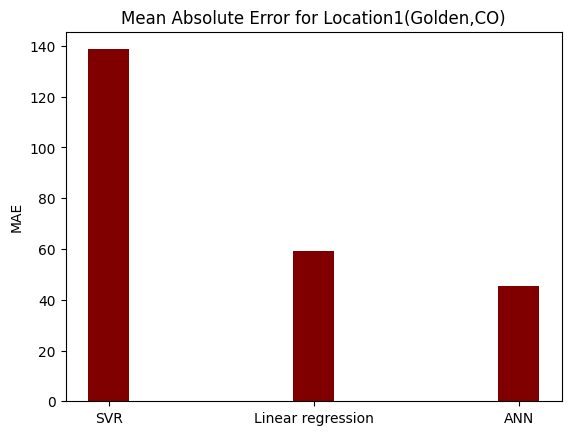

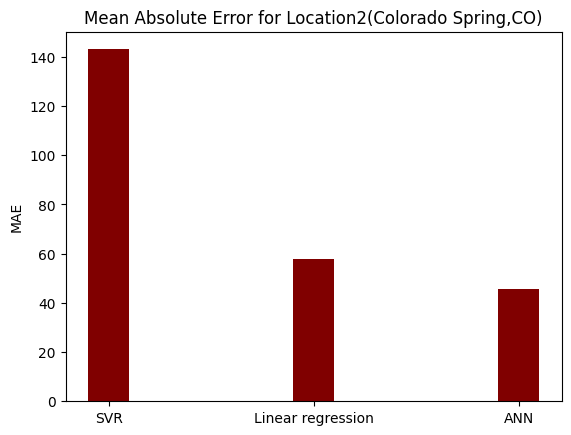

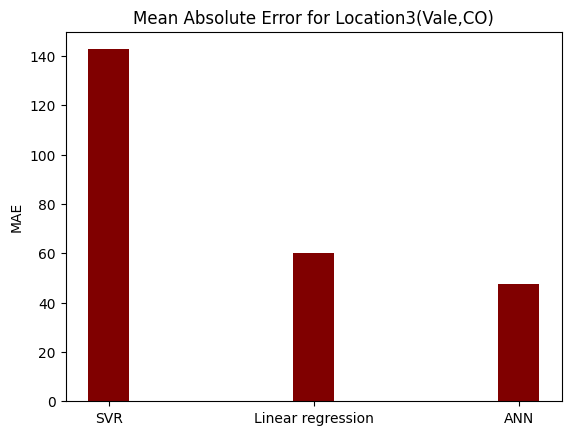

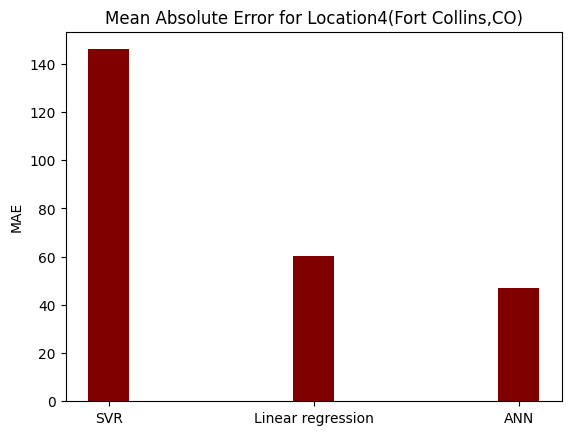

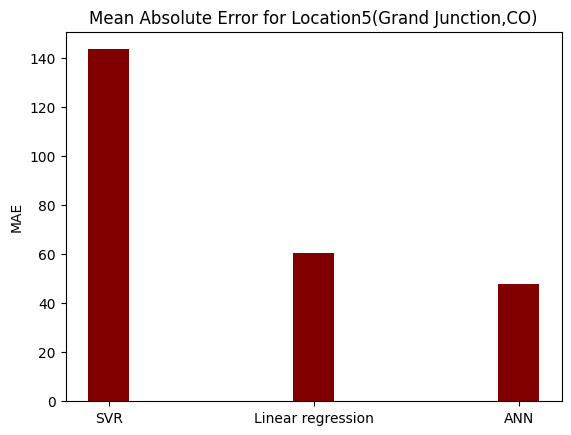

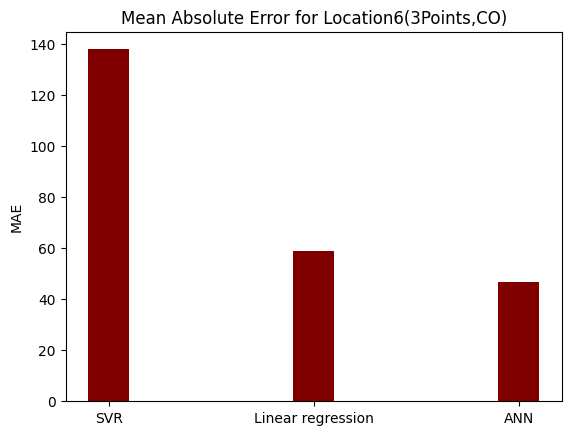

In [150]:
# comparing the results of all the models
reg = ['SVR', 'Linear regression', 'ANN']
for i in range(locs):
    plt.clf()
    plt.title('Mean Absolute Error for {}'.format(text[i]))
    reg_mae = [metrics.mean_absolute_error(testY_lst[i], y_pred_svr_lst[i]),
        metrics.mean_absolute_error(testY_lst[i], y_pred_linreg_lst[i]),
        metrics.mean_absolute_error(testY_lst[i], y_pred_ann_lst[i])]
    plt.bar(reg, reg_mae, width=0.2, color='maroon')
    # plt.xlabel("Models")
    plt.ylabel("MAE")

    
    # plt.legend()
    plt.show()

[[138.66804257190947, 143.0983746506255, 142.65426966082717, 146.07034254112017, 143.53092620359482, 137.75399286341357], [59.007753660050184, 57.835648218368924, 59.91998703822627, 60.267645246903434, 60.48154089518346, 58.70234133754035], [45.559401708740936, 45.55410504256474, 47.666582855298934, 47.16363799347389, 47.96227684275035, 46.53154610323712], [45.427966344264654, 43.14521357584707, 46.59206328378757, 46.2871647982675, 46.16037430230325, 45.804738439238825]]


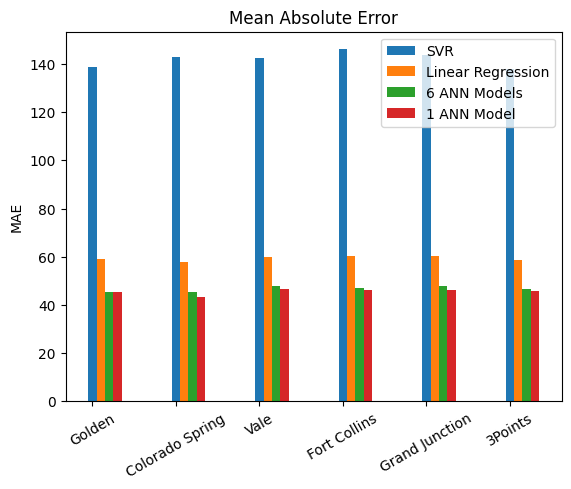

In [151]:
# Bar plot for all the models and all the locations
barWidth = 0.1
reg = ['SVR', 'Linear Regression', '6 ANN Models', '1 ANN Model']

reg_svr = []
reg_lin = []
reg_ann1 = []
reg_ann6 = []
for i in range(locs):
    reg_mae = []
    reg_svr.append(metrics.mean_absolute_error(testY_lst[i], y_pred_svr_lst[i]))
    reg_lin.append(metrics.mean_absolute_error(testY_lst[i], y_pred_linreg_lst[i]))
    reg_ann1.append(metrics.mean_absolute_error(testY_lst[i], y_pred_ann_lst[i]))
    reg_ann6.append(metrics.mean_absolute_error(testY_lst[i], big_y_pred_ann_lst[i]))

reg_all = [reg_svr, reg_lin, reg_ann1, reg_ann6]
print(reg_all)
plt.clf()
plt.title('Mean Absolute Error')
br_i = np.arange(locs)
for i in range(len(reg)):
    plt.bar(br_i, reg_all[i], width=barWidth, label=reg[i])
    br_i = [x + barWidth for x in br_i]
    # plt.xticks(br_i, ['Golden', 'Colorado Spring', 'Vale', 'Grandjunction', '3Points'])

plt.xticks(list(range(locs)), ['Golden', 'Colorado Spring', 'Vale', 'Fort Collins', 'Grand Junction', '3Points'], rotation=30) 
plt.ylabel("MAE")
plt.legend()
plt.show()

In [152]:
# make the time stamp matches the test Y
test_size = testY_lst[0].shape[0]
shifted_df = dfs[0].iloc[8:, :]
bad_df = shifted_df.isin(shifted_df.iloc[zero_index, :])
df_zero_deleted = shifted_df[~bad_df].dropna()
df_zero_deleted.shape
timest = df_zero_deleted.index[-test_size:]
print(timest)

DatetimeIndex(['2010-09-02 08:00:00', '2010-09-02 08:30:00',
               '2010-09-02 09:00:00', '2010-09-02 09:30:00',
               '2010-09-02 10:00:00', '2010-09-02 10:30:00',
               '2010-09-02 11:00:00', '2010-09-02 11:30:00',
               '2010-09-02 12:00:00', '2010-09-02 12:30:00',
               ...
               '2010-12-31 14:30:00', '2010-12-31 15:00:00',
               '2010-12-31 15:30:00', '2010-12-31 16:00:00',
               '2010-12-31 16:30:00', '2010-12-31 17:00:00',
               '2010-12-31 17:30:00', '2010-12-31 18:00:00',
               '2010-12-31 18:30:00', '2010-12-31 19:00:00'],
              dtype='datetime64[ns]', length=3503, freq=None)


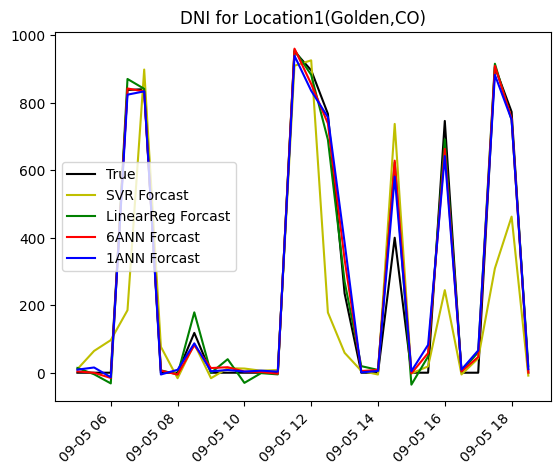

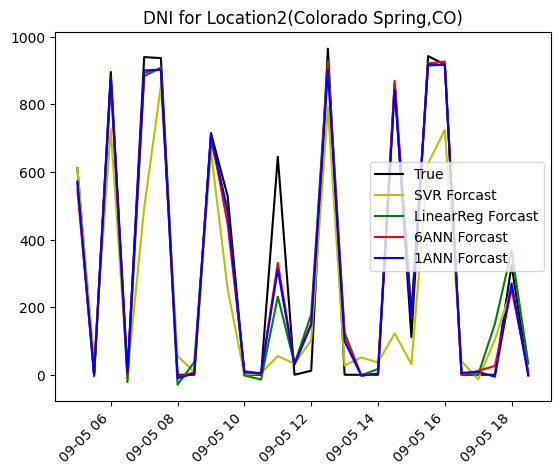

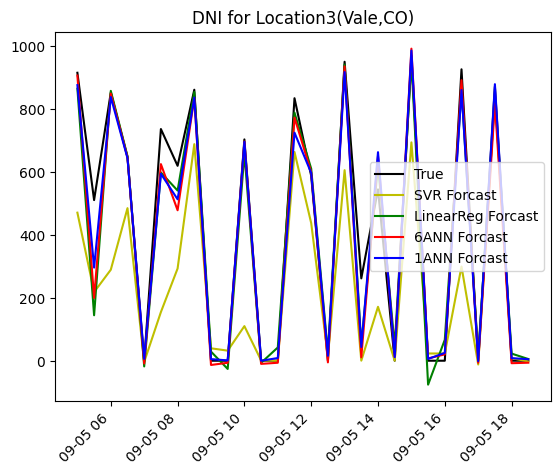

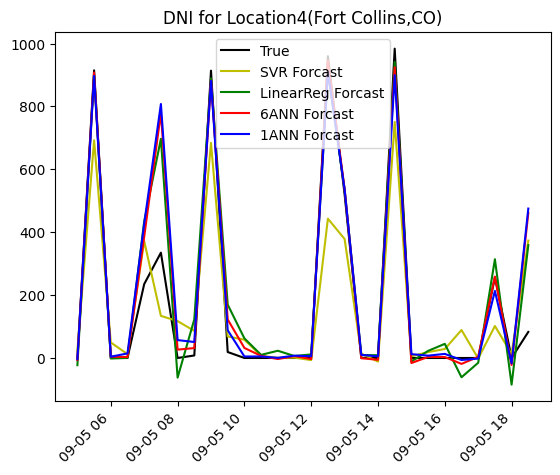

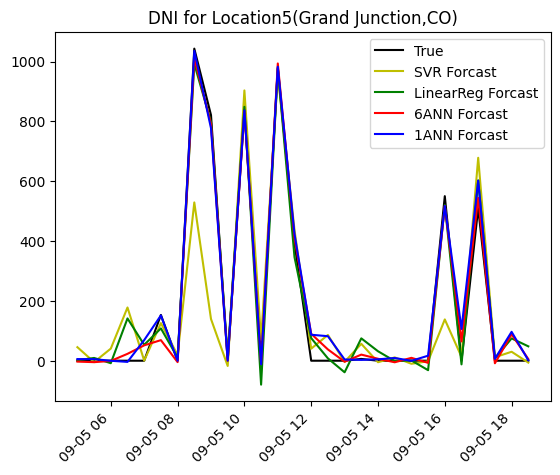

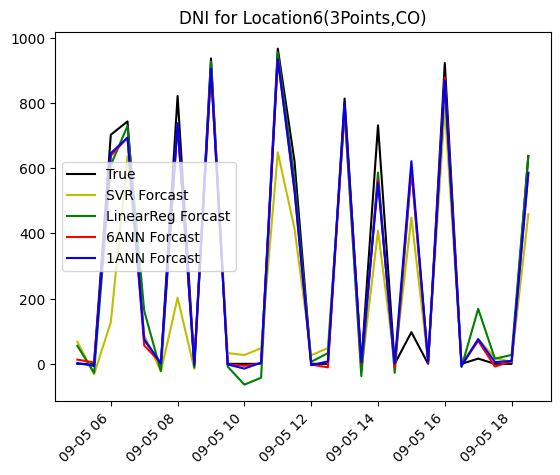

In [153]:
# plot a portion of the forcased, true signals

s = 81      #the iloc of the start sample to plot
l = 28      #the length of the plotted signal
for i in range(locs):
    plt.clf()
    plt.title('DNI for {}'.format(text[i]))
    plt.plot(timest[s:s+l], testY_lst[i][s:s+l], 'k', label='True')
    plt.plot(timest[s:s+l], y_pred_svr_lst[i][s:s+l], 'y', label='SVR Forcast')
    plt.plot(timest[s:s+l], y_pred_linreg_lst[i][s:s+l], 'g', label='LinearReg Forcast')
    plt.plot(timest[s:s+l], y_pred_ann_lst[i][s:s+l], 'r', label='6ANN Forcast')
    plt.plot(timest[s:s+l], big_y_pred_ann_lst[i][s:s+l], 'b', label='1ANN Forcast')
    
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    plt.show()

In [ ]:
# Trying out using basemap and create two maps in two subplots with some points
# No animation implemented yet!

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30,30)) 
fig, axes = plt.subplots(2, 1)
axes[0].set_title("Forecasted DNI using ANN model")
m1 = Basemap(projection='merc', lat_0 = p1_lat, lon_0 = p1_lon,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=-110, llcrnrlat=36,
    urcrnrlon=-101, urcrnrlat=42, ax=axes[0])

m1.bluemarble()
m1.drawstates()
m1.drawcounties()

axes[1].set_title("True DNI")
m2 = Basemap(projection='merc', lat_0 = p1_lat, lon_0 = p1_lon,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=-110, llcrnrlat=36,
    urcrnrlon=-101, urcrnrlat=42, ax=axes[1])

m2.bluemarble()
m2.drawstates()
m2.drawcounties()

for i in range(locs):
    x,y = m2(P_lons[i], P_lats[i])
    m2.plot(x,y, 'ro', markersize=2)
    plt.text(x+300, y+100, text[i][10:-4], fontsize=7, color='w')


plt.show()

In [155]:
# Moving results to another file
import pickle as pk
for i in range(locs):
    y_trans_ann_lst = list(np.reshape(y_pred_ann_lst[i],y_pred_ann_lst[i].shape[0]))
    y_trans_true_lst = list(np.reshape(testY_lst[i], testY_lst[0].shape[0]))
    
    with open("dump_data/pred_nn{}".format(i+1), "wb") as fp:   #Pickling
        pk.dump(y_trans_ann_lst, fp)

    with open("dump_data/true_y{}".format(i+1), "wb") as fp:   #Pickling
        pk.dump(y_trans_true_lst, fp)

In [156]:
################# Skip this cell, it worked better in a sperete file ====> plot_animate.py ####################
# import matplotlib.animation as animation 
# from matplotlib.animation import PillowWriter

# point = m.plot(x, y, 'ro', markersize=5)[0]

# def init(): 
#     point.set_markersize(0)
#     return point,

# # animation function.  This is called sequentially
# def animate(i):
#     s = 0.05 * i
#     # point.set_linewidth(s)
#     # m = Basemap(projection='merc', lat_0 = p1_lat, lon_0 = p1_lon, resolution = 'h', area_thresh = 0.1, llcrnrlon=-110, llcrnrlat=36, urcrnrlon=-101, urcrnrlat=42)
#     point.set_markersize(s)
#     return point, 
#     # m.bluemarble()
#     # m.drawstates()
#     # m.drawcounties()
    
#     # x,y = m(p1_lon, p1_lat)
#     # m.plot(x, y, 'yo', markersize=s)

# anim = animation.FuncAnimation(plt.gcf(), animate, init_func = init, frames = y_pred_list, interval = 20, blit = True)
# # writer = PillowWriter(fps=30)
# # anim.save("myMap.gif", writer=writer)

# # plt.tight_layout()
# plt.show()
# # anim.save('animatedMap.mp4', writer = 'sa', fps = 30)

In [173]:
sub_dfs[0].iloc[:, :-8]

,Temperature,Solar Zenith Angle,Relative Humidity,GHI,DHI,DNI
2010-01-01 00:00:00,-10,163.12,59.53,0,0,0
2010-01-01 00:30:00,-10,162.32,55.02,0,0,0
2010-01-01 01:00:00,-10,159.50,55.62,0,0,0
2010-01-01 01:30:00,-9,155.34,55.63,0,0,0
2010-01-01 02:00:00,-9,150.42,57.88,0,0,0
...,...,...,...,...,...,...
2010-12-31 21:30:00,-11,143.32,64.13,0,0,0
2010-12-31 22:00:00,-11,148.75,64.05,0,0,0
2010-12-31 22:30:00,-11,153.83,59.15,0,0,0
2010-12-31 23:00:00,-11,158.28,59.33,0,0,0


In [171]:
from sqlalchemy import create_engine

# database information
driver = "{SQL Server Native Client 11.0}"
server = "localhost"
database = "sara-nsrdb-dni;"

# user credentials 
uid="sara"
pwd= "nrel"

def load(df, tbl):
    try:
        rows_imported = 0
        # create an engine to write to the database
        engine = create_engine(f'postgresql://{uid}:{pwd}@{server}:5432/sara-nsrdb-dni')
        print(f'importing rows {rows_imported} to {rows_imported + len(df)}... for table {tbl}')
        # save df to postgres
        df.to_sql(f'loc_{tbl}', engine, if_exists='replace', index=False, chunksize=100000)
        rows_imported += len(df)
        print("Data imported successful")
    except Exception as e:
        print("Data load error: " + str(e))

In [172]:
# loop over locations and write the data to the database
for i in range(locs):
    load_df = sub_dfs[i].iloc[:, :-8]
    load(load_df, text[i][10:-4])

importing rows 0 to 17520... for table Golden
Data imported successful
importing rows 0 to 17520... for table Colorado Spring
Data imported successful
importing rows 0 to 17520... for table Vale
Data imported successful
importing rows 0 to 17520... for table Fort Collins
Data imported successful
importing rows 0 to 17520... for table Grand Junction
Data imported successful
importing rows 0 to 17520... for table 3Points
Data imported successful
